In [1]:
#MASTER

In [2]:
#import all necessary libraries
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import datetime as dt
from pandas_profiling import ProfileReport
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.cm as cm

In [3]:
######################################################################### download
#load the csv file and save it into the dataframe donors
mypath=os.path.join("..","Project","donors.csv")
donors=pd.read_csv(os.path.join(mypath),index_col = 0)

C:\Users\marta\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
#top 5 rows of dataset for visualization
donors.head()

ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE         DOB  \
0  2009-01-01     GRI      0    IL  61081                    1957-12-01   
1  2014-01-01     BOA      1    CA  91326                    1972-02-01   
2  2010-01-01     AMH      1    NC  27017                           NaN   
3  2007-01-01     BRY      0    CA  95953                    1948-01-01   
4  2006-01-01              0    FL  33176                    1940-01-01   

  NOEXCH RECINHSE  ...    AVGGIFT CONTROLN HPHONE_D RFA_2R RFA_2F RFA_2A  \
0      0           ...   7.741935    95515        0      L      4      E   
1      0           ...  15.666667   148535        0      L      2      G   
2      0           ...   7.481481    15078        1      L      4      E   
3      0           ...   6.812500   172556        1      L      4      E   
4      0        X  ...   6.864865     7112        1      L      2      F   

  MDMAUD_R MDMAUD_F MDMAUD_A GEOCODE2  
0        X        X        X        C  
1        X        X        X        A  
2        X        X        X        C  
3        X        X        X        C  
4        X        X        X        A  

[5 rows x 475 columns]

In [5]:
# check id unique
donors['CONTROLN'].unique().size

95412

In [6]:
donors.set_index('CONTROLN',drop=True,inplace=True)

In [7]:
#shape of dataset so number of rows and columns
donors.shape

(95412, 474)

In [8]:
#checking the null values in each column
donors.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 95515 to 185114
Data columns (total 474 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ODATEDW   95412 non-null  object 
 1   OSOURCE   95412 non-null  object 
 2   TCODE     95412 non-null  int64  
 3   STATE     95412 non-null  object 
 4   ZIP       95412 non-null  object 
 5   MAILCODE  95412 non-null  object 
 6   PVASTATE  95412 non-null  object 
 7   DOB       71529 non-null  object 
 8   NOEXCH    95412 non-null  object 
 9   RECINHSE  95412 non-null  object 
 10  RECP3     95412 non-null  object 
 11  RECPGVG   95412 non-null  object 
 12  RECSWEEP  95412 non-null  object 
 13  MDMAUD    95412 non-null  object 
 14  DOMAIN    95412 non-null  object 
 15  HOMEOWNR  95412 non-null  object 
 16  CHILD03   95412 non-null  object 
 17  CHILD07   95412 non-null  object 
 18  CHILD12   95412 non-null  object 
 19  CHILD18   95412 non-null  object 
 20  NUMCHLD   12386 non-nu

In [9]:
donors_original=donors.copy()

In [10]:
#checking the data types 
donors.dtypes

ODATEDW     object
OSOURCE     object
TCODE        int64
STATE       object
ZIP         object
             ...  
RFA_2A      object
MDMAUD_R    object
MDMAUD_F    object
MDMAUD_A    object
GEOCODE2    object
Length: 474, dtype: object

In [11]:
#count of missing values
donors.isna().sum()

ODATEDW       0
OSOURCE       0
TCODE         0
STATE         0
ZIP           0
           ... 
RFA_2A        0
MDMAUD_R      0
MDMAUD_F      0
MDMAUD_A      0
GEOCODE2    132
Length: 474, dtype: int64

In [12]:
#checking for duplicated observations
donors.duplicated().sum()

0

In [13]:
#descriptive statistics
donors.describe(include="all")

ODATEDW OSOURCE         TCODE  STATE    ZIP MAILCODE PVASTATE  \
count        95412   95412  95412.000000  95412  95412    95412    95412   
unique          54     896           NaN     57  19938        2        3   
top     2015-01-01     MBC           NaN     CA  85351                     
freq         15358    4539           NaN  17343     61    94013    93954   
mean           NaN     NaN     54.223117    NaN    NaN      NaN      NaN   
std            NaN     NaN    953.844476    NaN    NaN      NaN      NaN   
min            NaN     NaN      0.000000    NaN    NaN      NaN      NaN   
25%            NaN     NaN      0.000000    NaN    NaN      NaN      NaN   
50%            NaN     NaN      1.000000    NaN    NaN      NaN      NaN   
75%            NaN     NaN      2.000000    NaN    NaN      NaN      NaN   
max            NaN     NaN  72002.000000    NaN    NaN      NaN      NaN   

               DOB NOEXCH RECINHSE  ...       TIMELAG       AVGGIFT  \
count        71529  95412    95412  ...  85439.000000  95412.000000   
unique         847      6        2  ...           NaN           NaN   
top     1968-01-01      0           ...           NaN           NaN   
freq          1479  61203    88709  ...           NaN           NaN   
mean           NaN    NaN      NaN  ...      8.093739     13.347786   
std            NaN    NaN      NaN  ...      8.213242     10.769997   
min            NaN    NaN      NaN  ...      0.000000      1.285714   
25%            NaN    NaN      NaN  ...      4.000000      8.384615   
50%            NaN    NaN      NaN  ...      6.000000     11.636364   
75%            NaN    NaN      NaN  ...     11.000000     15.477955   
max            NaN    NaN      NaN  ...   1088.000000   1000.000000   

            HPHONE_D RFA_2R        RFA_2F RFA_2A MDMAUD_R MDMAUD_F MDMAUD_A  \
count   95412.000000  95412  95412.000000  95412    95412    95412    95412   
unique           NaN      1           NaN      4        5        4        5   
top              NaN      L           NaN      F        X        X        X   
freq             NaN  95412           NaN  46964    95118    95118    95118   
mean        0.500618    NaN      1.910053    NaN      NaN      NaN      NaN   
std         0.500002    NaN      1.072749    NaN      NaN      NaN      NaN   
min         0.000000    NaN      1.000000    NaN      NaN      NaN      NaN   
25%         0.000000    NaN      1.000000    NaN      NaN      NaN      NaN   
50%         1.000000    NaN      2.000000    NaN      NaN      NaN      NaN   
75%         1.000000    NaN      3.000000    NaN      NaN      NaN      NaN   
max         1.000000    NaN      4.000000    NaN      NaN      NaN      NaN   

       GEOCODE2  
count     95280  
unique        5  
top           A  
freq      34484  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN  

[11 rows x 474 columns]

In [14]:
# Pandas profiling
# ProfileReport(donors, minimal=True)

**Drop Columns**

In [15]:
#Based on previous analysis, we will drop the following columns (justification provided in report appendix??)

drop_columns =  (['OSOURCE','PVASTATE','NOEXCH','HOMEOWNR','MALEMILI','MALEVET','VIETVETS','WWIIVETS','LOCALGOV','STATEGOV','FEDGOV','GEOCODE','LIFESRC','HPHONE_D','GEOCODE2'] +
                #drop all ADATE columns          
                list(donors.filter(regex='^ADATE_',axis=1).columns.values) +
                #drop all the RFA columns
                list(donors.filter(regex='^RFA_',axis=1).columns.values)[:-3] +
                #drop all the RDATE columns
                list(donors.filter(regex='^RDATE_',axis=1).columns.values) + 
                #drop all the RAMNT columns
                list(donors.filter(regex='^RAMNT_',axis=1).columns.values))
                
donors.drop(drop_columns, axis=1,inplace=True)

In [16]:
#check that the columns were dropped successfully
donors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95412 entries, 95515 to 185114
Columns: 369 entries, ODATEDW to MDMAUD_A
dtypes: float64(27), int64(292), object(50)
memory usage: 269.3+ MB


In [17]:
#clean up the TCODE column
#typecast it into a string for treatment
donors['TCODE']=donors['TCODE'].astype(str)
donors['TCODE'].dtypes

dtype('O')

In [18]:
#treat T-code column to only keep the first 3 letters

donors['TCODE']=donors['TCODE'].map(lambda x: x[:-3] if '002' in x or '004' in x or '028' in x else x) # same code - same meaning without the gender and plural

donors['TCODE'].value_counts()

0       40917
1       27552
2       17006
28       8329
3         835
4         413
72         64
980        54
13         52
14         24
18         19
45         17
116        17
42         15
22         14
24         12
39         11
30          7
228         5
136         5
6           5
23          5
202         4
21          3
100         2
6400        2
17          2
9           2
134         2
94          2
58          1
50          1
7           1
12          1
40          1
96          1
47          1
25          1
61          1
36          1
38          1
76          1
27          1
44          1
93          1
Name: TCODE, dtype: int64

In [19]:
#clean up the ZIP column by getting rid of the '-' at the beginning of each entry and replacing it with nothing
donors['ZIP']=donors['ZIP'].str.replace("-","")
donors['ZIP'].head()

#check if converts to integer successfully, it means all '-'symbols were removed
donors['ZIP']=donors['ZIP'].astype(int)
donors['ZIP'].dtypes

dtype('int32')

In [20]:
#percentage of data with a Bad address
proportion=(len(donors[donors['MAILCODE']=='B'])/len(donors))*100
proportion
#since it's such a small percentage of the dataset and given the time & resource constraint for the projcet
#we decided to drop them

1.466272586257494

In [21]:
#drop the rows or donors which have a Bad address 
donors = donors[donors['MAILCODE']!='B']

#now we can drop the mailcode column because it no longer adds information to the data
donors.drop(['MAILCODE'], axis=1,inplace=True)

In [22]:
donors.info() # as we drop some rows the index is not ordered anymore

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94013 entries, 95515 to 185114
Columns: 368 entries, ODATEDW to MDMAUD_A
dtypes: float64(27), int32(1), int64(291), object(49)
memory usage: 264.3+ MB


In [23]:
#check the type of the DOB column
donors['DOB'].dtypes #it's a string

#treat the DOB to only show the year without the day or month
donors['DOB'] = donors['DOB'].str[:4]

donors['DOB'].head()

CONTROLN
95515     1957
148535    1972
15078      NaN
172556    1948
7112      1940
Name: DOB, dtype: object

In [24]:
donors['AGE'] = 2020 - donors['DOB'].astype('float')
donors.drop('DOB',axis=1, inplace=True)
donors['AGE'].replace(np.nan, donors['AGE'].mean(), inplace=True)

In [25]:
# Treat file flags columns with blanks and Xs to 0s and 1s
replaceFlag_dict = {' ': 0,'X': 1}
# Filtering the columns that start with 'REC' - record columns
rec_columns = donors.filter(regex='^REC',axis=1).columns.values
rec_columns 

array(['RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP'], dtype=object)

In [26]:
for rec in rec_columns:
    donors[rec].replace(replaceFlag_dict, inplace= True)

In [27]:
#check that it now only includes values 0 and 1
for rec in rec_columns : 
    print(donors[rec].value_counts())

0    87430
1     6583
Name: RECINHSE, dtype: int64
0    92049
1     1964
Name: RECP3, dtype: int64
0    93901
1      112
Name: RECPGVG, dtype: int64
0    92413
1     1600
Name: RECSWEEP, dtype: int64


In [28]:
#filling missing values of the gender column
#trying to associate it with tcode
donors['TCODE_original'] =donors_original['TCODE'].astype(str)
donors['TCODE_original'].unique()

array(['0', '1', '2', '28', '3', '1002', '42', '4', '18', '980', '14',
       '28028', '72', '22', '13002', '23', '45', '24', '4002', '30', '13',
       '202', '136', '72002', '96', '116', '100', '4004', '39002', '61',
       '47', '36', '228', '14002', '6', '6400', '40', '25', '21', '12',
       '58002', '134', '18002', '38', '9', '76', '50', '27', '93', '17',
       '94', '7', '44', '24002', '22002'], dtype=object)

In [29]:
female_list = ['2','3','28028','42']
male_list = ['1','36','40']
donors['gender_code'] = donors['TCODE_original'].map(lambda x: 'F' if '002' in x or x in female_list else 'M' if x in male_list else ' ')
donors['gender_code']

CONTROLN
95515      
148535    M
15078     M
172556     
7112       
         ..
184568    M
122706    M
189641    M
4693       
185114    F
Name: gender_code, Length: 94013, dtype: object

In [30]:
#check association with the categories F and M 
GENDER_vs_gender= donors[(donors.GENDER.isin(['F','M']))&(donors.gender_code!=' ')][['TCODE_original','GENDER','gender_code']]
GENDER_vs_gender

TCODE_original GENDER gender_code
CONTROLN                                  
148535                1      M           M
15078                 1      M           M
75768                 1      M           M
49909                 1      M           M
60127                 1      M           M
...                 ...    ...         ...
58178                 2      F           F
184568                1      M           M
122706                1      M           M
189641                1      M           M
185114                2      F           F

[43040 rows x 3 columns]

In [31]:
#adding a binary column with 1 if there's no match 
GENDER_vs_gender['inequality'] = np.where(GENDER_vs_gender['GENDER'] == GENDER_vs_gender['gender_code'], 0, 1)

#different gender association
GENDER_vs_gender[GENDER_vs_gender['inequality']==1]

TCODE_original GENDER gender_code  inequality
CONTROLN                                              
174431                1      F           M           1
99189              1002      M           F           1
109480                2      M           F           1
112359                2      M           F           1
180418                2      M           F           1
...                 ...    ...         ...         ...
40051                 2      M           F           1
32849              1002      M           F           1
114578                2      M           F           1
28349                 2      M           F           1
22658                 2      M           F           1

[5164 rows x 4 columns]

In [32]:
GENDER_vs_gender[GENDER_vs_gender['inequality']==1]['TCODE_original'].value_counts()
# there a lot of errors associating the gender with tcode (misters has females and misses as males, for example) 
# since we dont know the origin of the error we are not going to do this association given the assumptions that we need to do

2        3349
1002     1491
1         241
4002       34
3          32
39002       6
13002       4
28028       2
24002       1
58002       1
18002       1
42          1
22002       1
Name: TCODE_original, dtype: int64

In [33]:
# drop irrelevant columns (used just to do this association)
donors.drop(['TCODE_original','gender_code'], axis=1, inplace= True)

In [34]:
# we decided to replace the missing values with category U - unknown
# replace blanks, C, and A in gender column with U as they are all unknown values
replaceGender_dict = dict.fromkeys([' ', 'C', 'A'], 'U')
print(replaceGender_dict)
donors['GENDER'].replace(replaceGender_dict,inplace= True)

#check that it now only includes values that are listed/categorized in the meta data
donors['GENDER'].value_counts()

{' ': 'U', 'C': 'U', 'A': 'U'}


F    50514
M    38548
U     4589
J      362
Name: GENDER, dtype: int64

In [35]:
#treat the PEPSTRFL column to have 0s and 1s instead of blanks and Xs
donors['PEPSTRFL'].replace(replaceFlag_dict, inplace= True)

In [36]:
#check that it now only includes values 0 and 1
donors['PEPSTRFL'].value_counts()

0    49483
1    44530
Name: PEPSTRFL, dtype: int64

In [37]:
#check to see the column Tenure was added and FISTDATE was deleted
donors.columns.values 

array(['ODATEDW', 'TCODE', 'STATE', 'ZIP', 'RECINHSE', 'RECP3', 'RECPGVG',
       'RECSWEEP', 'MDMAUD', 'DOMAIN', 'CHILD03', 'CHILD07', 'CHILD12',
       'CHILD18', 'NUMCHLD', 'INCOME', 'GENDER', 'WEALTH1', 'HIT',
       'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM',
       'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY',
       'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'DATASRCE', 'SOLP3', 'SOLIH',
       'MAJOR', 'WEALTH2', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG',
       'HOMEE', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS',
       'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS',
       'PLATES', 'PEPSTRFL', 'POP901', 'POP902', 'POP903', 'POP90C1',
       'POP90C2', 'POP90C3', 'POP90C4', 'POP90C5', 'ETH1', 'ETH2', 'ETH3',
       'ETH4', 'ETH5', 'ETH6', 'ETH7', 'ETH8', 'ETH9', 'ETH10', 'ETH11',
       'ETH12', 'ETH13', 'ETH14', 'ETH15', 'ETH16', 'AGE901', 'AGE902',
       'AGE903', 'AGE904', 'AGE905', 'AGE906', 'AGE907', 'CHIL1', 'CHIL2'

In [38]:
###### MARTAAAA

In [39]:
#treat the column CHILD03,CHILD07, CHILD12, CHILD18  in order to have 0, 1 and 2 instead of blank, M, F and B, respectively and then create a new variable by summing them, called number_child. Remove column NUMCHLD

childAge_columns = donors.filter(regex='^CHILD', axis=1).columns.values
sum_dict = {"B":2,"M":1,"F": 1," ":0}

# replacement
for age in childAge_columns:
    donors[age].replace(sum_dict, inplace=True)

# confirm that the change was rightly made
for age in childAge_columns:
    print(donors[age].unique())
    
# create a new variable named number_child that will sum the values per row under CHILD03,CHILD07, CHILD12, CHILD18 columns in order to create our variable that informs on the number of children per donor
donors["number_child"]= donors[childAge_columns].sum(axis=1)

# percentage of values that remained the same when comparing the variable NUMCHLD and the one created by us, number_child
compare_numchld_number_child = np.where(donors["NUMCHLD"] == donors["number_child"], True, False)
print(np.sum(compare_numchld_number_child *1)/len(donors)) # the percentage is 88,054%

# shows the difference between values under the columns  NUMCHLD and number_child
diff = donors['NUMCHLD'] - donors['number_child']
print(diff.value_counts()) #84014 rows are equal between the 2 columns

# drop column NUMCHLD
donors.drop(["NUMCHLD"],axis=1,inplace=True)

[0 1 2]
[0 1 2]
[0 1 2]
[0 1 2]
0.026730345803239977
 1.0    6376
 0.0    2513
 2.0    2134
 3.0     611
-1.0     379
 4.0     169
-2.0      50
 5.0      33
-3.0       9
-4.0       3
 6.0       2
dtype: int64


In [40]:
# treat column HIT in order to analyse the presence of outliers

#create a boxplot for the variable HIT
sns.boxplot(y=donors["HIT"])
plt.figure(figsize=(30,15))

plt.show()

#create a histogram for the variable HIT
sns.set() 
plt.figure(figsize=(30,15))

sns.countplot(x=donors["HIT"])
plt.title("Number of times donors replied to mail order offers other than PVA")

plt.show() #The hits of 32 to 241 account for a very low number of donors

#assessment of outliers with interquartile range
q25 = donors[["HIT"]].quantile(.25)
q75 = donors[["HIT"]].quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters3 = []
for metric in donors[["HIT"]]:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters3.append(donors["HIT"].between(llim, ulim, inclusive=True))

filters3 = pd.Series(np.all(filters3, 0), index=donors.index)
my_project_f3 = donors[filters3]

#how much data is kept with interquartile range
print('Percentage of data kept after removing outliers:', np.round(my_project_f3.shape[0] / donors.shape[0], 4))

#detect outliers manually by limiting the number of replies to 31
filters1 = ((donors["HIT"]<=31))
my_project_noutliers = donors[filters1]

# how much data is kept if we limit the number of replies to 31
print('Percentage of data kept after removing outliers:', np.round(my_project_noutliers.shape[0] / donors.shape[0], 4))

#detect outliers manually by limiting the number of replies to 84
filters2 = ((donors["HIT"]<=84))
my_project_f2 = donors[filters2]

#how much data is kept if we limit the number of replies to 84
print('Percentage of data kept after removing outliers:', np.round(my_project_f2.shape[0] / donors.shape[0], 4))

# decide on keeping only the donors who reply until 31 times
donors= donors[filters1]


<ipython-input-40-6afbfb2a3776>:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-40-6afbfb2a3776>:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show() #The hits of 32 to 241 account for a very low number of donors


Percentage of data kept after removing outliers: 0.8563
Percentage of data kept after removing outliers: 0.9894
Percentage of data kept after removing outliers: 0.9992


In [41]:
# treat the column SOLP3 so it is possible to integrate the information in the column RECP3 and then delete it, this will happen by distinguishing between donors that are not in P3 program and the ones who can receive always emails

#number of elements under column SOLP3 have a correspondent blank value under RECP3, meaning they represent donors who are not in P3 program.
donors[["RECP3","SOLP3"]].groupby(by=["RECP3"]).count()

#number of blank cells under SOLP3 which can account for missing values,donors who can be mailed as many times as we want or not member of P3 program. .
donors["SOLP3"].isin([" "]).sum(axis=0)

#index of the donors who don't belong to P3 program because they have a blank value under RECP3
grouped= donors[["RECP3","SOLP3"]].groupby(by=["RECP3"]).get_group(0).index

#transform the values under the column SOLP3  correspondent to the above axis in -1
solp31=donors.loc[grouped]["SOLP3"].replace(" ",-1)

#index of the donors who  belong to P3 program because they have a X under RECP3
grouped1=donors[["RECP3","SOLP3"]].groupby(by=["RECP3"]).get_group(1).index

#transform the donors under SOLP3 correspondent to the above axis and assume that they can be mailed as many times as we want to the number 12
solp32=donors.loc[grouped1]["SOLP3"].replace(" ",12)

#return the column SOLP3 with the necessary changes
donors["SOLP3"]=pd.concat([solp31,solp32])

#confirm the values under SOLP3
donors["SOLP3"].unique()

#transform the strings in integer
donors["SOLP3"].replace({"SOLP3": {"00":0,"12":12,"01": 1,"02":2}}, inplace=True)

#confirm the values under SOLP3
donors["SOLP3"].unique()

#drop the column RECP3
donors.drop(["RECP3"], axis=1,inplace=True)

In [42]:
#treat column SOLIH so it is possible to integrate the information in the column RECINHSE and then delete it, this will happen by distinguishing between donors that are not in IN House program and the ones who can receive always emails

#number of elements under column SOLIH have a correspondent blank value under RECINHSE, meaning they represent donors who are not inHouse program.
donors[["RECINHSE","SOLIH"]].groupby(by=["RECINHSE"]).count()

#index of the donors who don't belong to In House  program because they have a blank value under RECINHSE
SOLIHg_index1= donors.loc[donors['RECINHSE']==0].index.values

#transform the donors who don't belong to In House program under SOLIH in -1.
SOLIH1=donors.loc[SOLIHg_index1]["SOLIH"].replace(" ",-1)

#index of the donors who  belong to In House program because they have a X under RECINHSE
SOLIHg_index2=donors.loc[donors['RECINHSE']==1].index.values

#transform the donors under SOLIH" correspondent to the above axis and assume that they can be mailed as many times as we want to the number 12
SOLIH2=donors.loc[SOLIHg_index2]["SOLIH"].replace(" ",12)

#return the column SOLIH with the necessary changes
donors["SOLIH"]=pd.concat([SOLIH1,SOLIH2])

#confirm the values under SOLIH
donors["SOLIH"].unique()

#transform the strings in integer
donors.replace({"SOLIH": {"00":0,"12":12,"01":1,"02":2,"03":3,"04":4,"06":6}}, inplace=True)

#confirm the values under SOLIH
donors["SOLIH"].unique()

#drop the column RECINHSE
donors.drop(["RECINHSE"], axis=1,inplace=True)

In [43]:
#treat column MAJOR to see if the information matches the one in the column  MDMAUD, regarding no major donors, and if yes delete MAJOR

#check if all the donors with blank cells (not a major donor) under MAJOR correspond a donors with X value (meaning not a major donor) under  MDMAUD
donors.loc[donors["MAJOR"] ==" "][["MDMAUD"]] ["MDMAUD"].value_counts() #We can conclude that all blank values under column Major (that represent the not major donor) have a correspondent X in the column MDMAUD, so the column Major can be deleted 

#drop column MAJOR
donors.drop("MAJOR",axis=1, inplace=True)

In [44]:
###### BIAAAA

In [45]:
# Relation of WEALTH1 and INCOME
# First idea : As both variables tend to be very correlated we just wanted to keep one of them. 
# And looking at the amount of missing values, the idea is to pick the variable with less missing values (INCOME) and try to fill the possible values with the help of WEALTH1.
print('Percentage of missing values:')
print('WEALTH1 -', donors['WEALTH1'].isna().sum()/len(donors)*100)
print('INCOME -', donors['INCOME'].isna().sum()/len(donors)*100)

Percentage of missing values:
WEALTH1 - 47.19182058614832
INCOME - 22.36867568323048


In [46]:
# Try to understand the distribution of INCOME by each WEALTH1
donors.groupby(['WEALTH1'])['INCOME'].value_counts().unstack()

INCOME   1.0   2.0  3.0   4.0   5.0   6.0   7.0
WEALTH1                                        
0.0      853   612  254   271   220    66    63
1.0      869  1040  419   472   354   111    91
2.0      812  1157  547   634   552   151   113
3.0      689  1080  586   679   730   203   133
4.0      607  1107  701   878   941   264   186
5.0      579   984  680  1086  1171   394   235
6.0      494   941  783  1180  1312   603   341
7.0      408   761  695  1289  1550   692   600
8.0      318   528  581  1281  1816  1049  1000
9.0      180   279  340   936  1660  1706  2222

In [47]:
# Defining a dictionary to associate the WEALTH1 with the most frequent INCOME
replace_income = donors.groupby(['WEALTH1'])['INCOME'].apply(lambda x: x.value_counts().index[0])
replace_income

WEALTH1
0.0    1.0
1.0    2.0
2.0    2.0
3.0    2.0
4.0    2.0
5.0    5.0
6.0    5.0
7.0    5.0
8.0    5.0
9.0    7.0
Name: INCOME, dtype: float64

In [48]:
# New series with the dictionary association
income_wealth1 = donors.WEALTH1.replace(replace_income)

In [49]:
income_wealth1

CONTROLN
95515     NaN
148535    7.0
15078     2.0
172556    2.0
47784     NaN
         ... 
184568    NaN
122706    7.0
189641    NaN
4693      NaN
185114    5.0
Name: WEALTH1, Length: 93014, dtype: float64

In [50]:
# Replacing the nans of INCOME with the WEALTH1 association 
donors.INCOME = np.where(pd.isnull(donors.INCOME), income_wealth1 , donors.INCOME)

In [51]:
# New percentage of missing values 
print('INCOME -', donors['INCOME'].isna().sum()/len(donors)*100)
# They stayed the same ??? 

INCOME - 22.36867568323048


In [52]:
# Check the missing values of WEALTH1 on INCOME nans
donors[donors['INCOME'].isna()]['WEALTH1']

CONTROLN
95515    NaN
47784    NaN
49909    NaN
12890    NaN
42556    NaN
          ..
78831    NaN
47945    NaN
156106   NaN
184568   NaN
189641   NaN
Name: WEALTH1, Length: 20806, dtype: float64

In [53]:
# All of the INCOME missing values are in common with WEALTH1 !!! We can't fill any value with this idea !
donors[donors['INCOME'].isna()]['WEALTH1'].isna().sum()/donors['INCOME'].isna().sum()

1.0

In [54]:
# What about WEALTH2?
donors[['WEALTH1','WEALTH2']].corr() # highly correlated

WEALTH1   WEALTH2
WEALTH1  1.000000  0.869682
WEALTH2  0.869682  1.000000

In [55]:
print(donors['WEALTH1'].isna().sum(),donors['WEALTH2'].isna().sum()) # WEALTH1 more missing values

43895 42915


In [56]:
# Drop WEALTH1 since it has more missing values and its very correlated with WEALTH2 (treat the missing values after with knn imputation)
donors.drop('WEALTH1', axis=1, inplace=True)

In [57]:
# The following variables indicate the number of known times the donor has responded to other types of mail order offers. 
# Convert them into Y/N columns like the interests variables because anyways there are too many missing values in these HIT variables 
# (with this solution we will lose the degree of interest but its only for 50% of the data which is not a problem)

mail_offers = list(donors.filter(regex='^MB',axis=1).columns.values) + list(donors.filter(regex='^MAG',axis=1).columns.values)+ list(donors.filter(regex='^PUB',axis=1).columns.values)
donors[mail_offers]

MBCRAFT  MBGARDEN  MBBOOKS  MBCOLECT  MAGFAML  MAGFEM  MAGMALE  \
CONTROLN                                                                   
95515         NaN       NaN      NaN       NaN      NaN     NaN      NaN   
148535        0.0       0.0      3.0       1.0      1.0     1.0      0.0   
15078         0.0       0.0      1.0       0.0      0.0     0.0      0.0   
172556        0.0       0.0      0.0       0.0      0.0     0.0      0.0   
47784         NaN       NaN      NaN       NaN      NaN     NaN      NaN   
...           ...       ...      ...       ...      ...     ...      ...   
184568        NaN       NaN      NaN       NaN      NaN     NaN      NaN   
122706        0.0       0.0      1.0       0.0      0.0     0.0      0.0   
189641        NaN       NaN      NaN       NaN      NaN     NaN      NaN   
4693          NaN       NaN      NaN       NaN      NaN     NaN      NaN   
185114        0.0       0.0      0.0       0.0      1.0     0.0      0.0   

          PUBGARDN  PUBCULIN  PUBHLTH  PUBDOITY  PUBNEWFN  PUBPHOTO  PUBOPP  
CONTROLN                                                                     
95515          NaN       NaN      NaN       NaN       NaN       NaN     NaN  
148535         0.0       0.0      2.0       0.0       3.0       0.0     0.0  
15078          0.0       0.0      1.0       0.0       0.0       0.0     0.0  
172556         0.0       0.0      0.0       0.0       0.0       0.0     1.0  
47784          NaN       NaN      NaN       NaN       NaN       NaN     NaN  
...            ...       ...      ...       ...       ...       ...     ...  
184568         NaN       NaN      NaN       NaN       NaN       NaN     NaN  
122706         0.0       0.0      0.0       0.0       0.0       0.0     0.0  
189641         NaN       NaN      NaN       NaN       NaN       NaN     NaN  
4693           NaN       NaN      NaN       NaN       NaN       NaN     NaN  
185114         0.0       0.0      0.0       0.0       0.0       0.0     1.0  

[93014 rows x 14 columns]

In [58]:
for mail in mail_offers: donors[mail] = donors[mail].apply(lambda x: 1 if x>0 else 0) 

In [59]:
donors[mail_offers]

MBCRAFT  MBGARDEN  MBBOOKS  MBCOLECT  MAGFAML  MAGFEM  MAGMALE  \
CONTROLN                                                                   
95515           0         0        0         0        0       0        0   
148535          0         0        1         1        1       1        0   
15078           0         0        1         0        0       0        0   
172556          0         0        0         0        0       0        0   
47784           0         0        0         0        0       0        0   
...           ...       ...      ...       ...      ...     ...      ...   
184568          0         0        0         0        0       0        0   
122706          0         0        1         0        0       0        0   
189641          0         0        0         0        0       0        0   
4693            0         0        0         0        0       0        0   
185114          0         0        0         0        1       0        0   

          PUBGARDN  PUBCULIN  PUBHLTH  PUBDOITY  PUBNEWFN  PUBPHOTO  PUBOPP  
CONTROLN                                                                     
95515            0         0        0         0         0         0       0  
148535           0         0        1         0         1         0       0  
15078            0         0        1         0         0         0       0  
172556           0         0        0         0         0         0       1  
47784            0         0        0         0         0         0       0  
...            ...       ...      ...       ...       ...       ...     ...  
184568           0         0        0         0         0         0       0  
122706           0         0        0         0         0         0       0  
189641           0         0        0         0         0         0       0  
4693             0         0        0         0         0         0       0  
185114           0         0        0         0         0         0       1  

[93014 rows x 14 columns]

In [60]:
# Convert Y/' ' of the interests variables into 1/0
replaceBool_dict = {'Y': 1,' ': 0}
interests = ['COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE',
       'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS',
       'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS',
       'PLATES']
for interest in interests: donors[interest].replace(replaceBool_dict, inplace = True)

In [61]:
# Treating redundant variables regarding the donor interests and the response to an email about that interest
##common_topics - crafts, gardening, collectables, photos, family stuff 
common_topics =[['MBCRAFT', 'CRAFTS'],['MBGARDEN','GARDENIN'],['PUBGARDN','GARDENIN'],['MBCOLECT','COLLECT1'],['MBCOLECT','PLATES'],['PUBPHOTO', 'PHOTO'],['MAGFAML','KIDSTUFF']]
common_topics

[['MBCRAFT', 'CRAFTS'],
 ['MBGARDEN', 'GARDENIN'],
 ['PUBGARDN', 'GARDENIN'],
 ['MBCOLECT', 'COLLECT1'],
 ['MBCOLECT', 'PLATES'],
 ['PUBPHOTO', 'PHOTO'],
 ['MAGFAML', 'KIDSTUFF']]

In [62]:
# if the donor responds to an email = he has interest
for topic in common_topics:
        donors[topic[1]] = np.where(donors[topic[0]]==1, 1, donors[topic[1]])

In [63]:
# drop columns
donors.drop(mail_offers, axis=1, inplace=True)

In [64]:
##### Treating dates from promotion and gifts history
# Analysis date 
present_date = dt.datetime.strptime('2020-09-01', '%Y-%m-%d')

In [65]:
# Function to calculate the interval of time between meaningful dates (in months, as TIMELAG)
def diff_month(d1,d2):
    return d1.dt.month - d2.dt.month + 12*(d1.dt.year - d2.dt.year)

In [66]:
# Interval between first gift and present date to understand how long the donors started to donate (this one in years)
donors['TENURE'] = 2020 - donors['FISTDATE'].str[:4].astype(float)
donors['TENURE'].value_counts()

5.0     13781
6.0     12520
7.0      9344
14.0     8700
9.0      8401
12.0     7899
10.0     7449
13.0     7329
8.0      7299
4.0      5126
11.0     5057
15.0       39
16.0       21
17.0       13
18.0        9
19.0        9
20.0        4
26.0        3
23.0        3
22.0        2
21.0        1
51.0        1
25.0        1
28.0        1
Name: TENURE, dtype: int64

In [67]:
# Using last gift date to calculate the inactivity of the donor (how long we dont receive donations)
donors['INACTIVITY'] = diff_month(pd.Series(present_date,index=donors.index),pd.to_datetime(donors['LASTDATE']))
donors['INACTIVITY'].value_counts()

57    19348
56    11685
55    10835
54    10222
58     8059
60     6289
59     5282
63     4321
65     4304
62     2896
61     2729
64     2364
43      798
45      740
44      724
66      484
46      419
47      395
48      271
52      211
49      198
53      166
51      139
50      135
Name: INACTIVITY, dtype: int64

In [68]:
# Trying to understand the effectiveness of last promotion, if the donor donate after the promotion or not
donors['PROMUSE'] = diff_month(pd.to_datetime(donors['LASTDATE']),pd.to_datetime(donors['MAXADATE']))

donors['PROMUSE'].value_counts()

-14    19283
-13    11657
-12    10853
-11    10248
-15     8052
-17     6295
-16     5270
-20     4330
-22     4287
-19     2876
-18     2737
-21     2354
 0       798
-2       743
-1       722
-23      481
-3       418
-4       395
-5       268
-9       249
-10      215
-6       199
-8       144
-7       136
 2         2
 1         2
Name: PROMUSE, dtype: int64

In [69]:
# drop FISTDATE since it's not as informative after the feature engineering of the tenure column
donors.drop(['FISTDATE','NEXTDATE','MAXADATE','MINRDATE','MAXRDATE','LASTDATE'], axis=1, inplace= True)

In [70]:
# fill missing values of Data Source of Overlay Data
donors['DATASRCE'].replace(' ', 0, inplace=True)
donors['DATASRCE'] = donors['DATASRCE'].astype(int)

In [71]:
donors.shape

(93014, 347)

In [72]:
donors.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93014 entries, 95515 to 185114
Data columns (total 347 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ODATEDW       93014 non-null  object 
 1   TCODE         93014 non-null  object 
 2   STATE         93014 non-null  object 
 3   ZIP           93014 non-null  int32  
 4   RECPGVG       93014 non-null  int64  
 5   RECSWEEP      93014 non-null  int64  
 6   MDMAUD        93014 non-null  object 
 7   DOMAIN        93014 non-null  object 
 8   CHILD03       93014 non-null  int64  
 9   CHILD07       93014 non-null  int64  
 10  CHILD12       93014 non-null  int64  
 11  CHILD18       93014 non-null  int64  
 12  INCOME        72208 non-null  float64
 13  GENDER        93014 non-null  object 
 14  HIT           93014 non-null  int64  
 15  DATASRCE      93014 non-null  int32  
 16  SOLP3         93014 non-null  object 
 17  SOLIH         93014 non-null  int64  
 18  WEALTH2       50099 

In [73]:
#REDUNDANCY

#check the variables that are highly correlated (more than or equal to 90%) and drop one of them to avoid redundancy

corr_matrix = donors.corr().abs()
high_corr_var=np.where(corr_matrix>=0.9)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('POP901', 'POP902'),
 ('POP901', 'POP903'),
 ('POP902', 'POP903'),
 ('ETH2', 'ETHC4'),
 ('ETH2', 'ETHC5'),
 ('ETH5', 'ETH13'),
 ('ETH5', 'LSC2'),
 ('AGE901', 'AGE902'),
 ('AGE901', 'AGE904'),
 ('AGE902', 'AGE903'),
 ('AGE902', 'AGE904'),
 ('AGE902', 'AGE905'),
 ('AGE902', 'AGE906'),
 ('AGE903', 'AGE904'),
 ('AGE903', 'AGE905'),
 ('AGE903', 'AGE906'),
 ('AGE904', 'AGE905'),
 ('AGE904', 'AGE906'),
 ('AGE905', 'AGE906'),
 ('AGE907', 'HHD1'),
 ('AGEC6', 'HHAGE1'),
 ('AGEC7', 'MARR3'),
 ('HHAGE1', 'HHAGE3'),
 ('HHAGE1', 'HHAS1'),
 ('HHAGE3', 'HHAS1'),
 ('HHN1', 'HHD11'),
 ('HHN3', 'HHN4'),
 ('HHN3', 'HHP1'),
 ('HHN3', 'HHP2'),
 ('HHN3', 'HHD1'),
 ('HHN3', 'HHD4'),
 ('HHN3', 'RHP3'),
 ('HHN4', 'HHP1'),
 ('HHN4', 'HHP2'),
 ('HHN4', 'HHD1'),
 ('HHN4', 'RHP3'),
 ('HHN5', 'HHN6'),
 ('MARR1', 'HHD3'),
 ('HHP1', 'HHP2'),
 ('HHP1', 'HHD1'),
 ('HHP1', 'RHP3'),
 ('HHP2', 'RHP3'),
 ('DW1', 'DW2'),
 ('DW4', 'DW5'),
 ('DW4', 'DW6'),
 ('DW5', 'DW6'),
 ('DW5', 'HUPA2'),
 ('DW5', 'HUPA6'),
 ('DW6', 'HUPA

In [74]:
#REDUNDANCY

#90% correlation

#can drop POP902 (no of families) and POP903 (no of households) since redundant with POP901(no. of persons)
donors.drop(['POP902','POP903'], axis=1,inplace=True)

#can drop ETHC4(%black < Age 15) & ETHC5(%black 15 - 59) since redundant with ETH2(%black)...logically, age of the 
#people in the neighbourhood will not affect the willingness of the donor to donate making this info irrelevant
donors.drop(['ETHC4','ETHC5','ETHC6'], axis=1,inplace=True)

#can drop since the ages of the races are irrelevant and we already have the info on how many white people live in the 
#neighbourhood in ETH1
donors.drop(['ETHC1','ETHC2','ETHC3'], axis=1,inplace=True)

#can drop ETH13(%mexican) & LSC2 (%spanish speaking) since redundant with ETH5(%hispanic)...hispanic includes all 
#latinos (aka spanish speaking)
#drop all language variables due to lack of relevancy
donors.drop(['ETH13','ETH14','ETH15','ETH16','LSC1','LSC2','LSC3','LSC4'], axis=1,inplace=True)

#can drop these Ages because, AGEC variables are more informative and disaggregated...will keep summary variables 
#AGE904 (avg age of population) and AGE907 (%population under 18)
donors.drop(['AGE901','AGE902','AGE903','AGE905','AGE906'], axis=1,inplace=True)

#can drop this children ages because they are not as relevant since don't impact decision to donate...thus we will keep
#the CHIL variable instead since it is more aggregated
child_list=donors.filter(regex='^CHILC',axis=1).columns.values
donors.drop(child_list,axis=1,inplace=True)

#can drop HHD1(%Households w/ Related Children) since redundant with AGE907(%Population Under Age 18) 
donors.drop('HHD1', axis=1,inplace=True)

#can drop all MARR variables since once again it refers to neighbourhood not the donor himself, meaning that if my
#neighbour is widowed, this would not affect my decision to doate to veterans
donors.drop(['MARR1','MARR2','MARR3','MARR4'], axis=1,inplace=True)

#can drop HHAGE variables due to lack of relevancy since the ages of people in a household in a donor's neighbourhood
#won't impact his/her decision to donate
donors.drop(['HHAGE1','HHAGE2','HHAGE3'], axis=1,inplace=True)

#can drop HHD variables because describes who lives in each household while RHP (rooms), HHP (avg & median) & HHN describes number of people per household
#these variables refer to the neighbourhood meaning they have minimal influence on donors' decision to donate...
#so we can drop them due to lack of relevancy
HHD_list=donors.filter(regex='^HHD',axis=1).columns.values
HHN_list=donors.filter(regex='^HHN',axis=1).columns.values
donors.drop(np.concatenate([HHD_list,HHN_list]), axis=1,inplace=True)
donors.drop(['HHP1','HHP2'], axis=1,inplace=True)
donors.drop(['RHP1','RHP2','RHP3','RHP4'], axis=1,inplace=True)

#can drop HHAS variables which demonstrate a 'poor' neighbourhood which is also represented in IC6 (very low income)
donors.drop(['HHAS1','HHAS2','HHAS3','HHAS4'], axis=1,inplace=True)

#since DW variables refer to the style of house unit structures within neighbourhoods, this wouldn't influence donor behaviour
#thus drop them due to lack of relevancy
DW_list=donors.filter(regex='^DW',axis=1).columns.values
donors.drop(DW_list, axis=1,inplace=True)

#since HUPA refers to home style in neighbourhood,this wouldn't influence donor behaviour thus drop them due to lack of relevancy
HUPA_list=donors.filter(regex='^HUPA',axis=1).columns.values
donors.drop(HUPA_list, axis=1,inplace=True)

#can drop all HV variables since it represents average and median value which is a monetary value not a percentage. This
#is a problem because the census was created in 2010 which means the money will not have the same value today...HVP variables 
#are a better substitute
donors.drop(['HV1','HV2','HV3','HV4'], axis=1,inplace=True)

#can drop all RP variables because HVP variables tell us more about the donor
donors.drop(['RP1','RP2','RP3','RP4'], axis=1,inplace=True)

#can drop all HU variables except HU2 (correlated wuth HU1) because it can tell us the probability that the donor is a 
#renter or not(if he/she is a renter means they are mobile/unstable (lower family loading??) but also with more bills to pay)
#keep HU5 to know if the neighbourhood is only a holiday one so only occassionally inhabited
donors.drop(['HU1','HU3','HU4'], axis=1,inplace=True)

#can drop all IC variables except IC3, IC5 because average, household and per capita are more meaningful than median (especially
#when they have the same distributions) and families
donors.drop(['IC1','IC2','IC4'], axis=1,inplace=True)

#can drop IC15-IC23, since we will focus on households rather than families' income
IC_list = donors.filter(regex='^IC',axis=1).columns.values[11:]
donors.drop(IC_list, axis=1,inplace=True)

#can drop all TPE variables as they are irrelevant to the donors' decision to donate (the mode of transportation of 
#the neighbourhood can hint to its income which we already have in IC variables)
TPE_list = donors.filter(regex='^TPE',axis=1).columns.values
donors.drop(TPE_list, axis=1,inplace=True)

#can drop all LFC variables as the neighbours' employment status will not affect the donors' behaviour
LFC_list = donors.filter(regex='^LFC',axis=1).columns.values
donors.drop(np.delete(LFC_list,9), axis=1,inplace=True)

#can drop all OCC, EIC since the type of employment of the neighbours 10 years ago will not affect the donation decision
OCC_list = donors.filter(regex='^OCC',axis=1).columns.values
EIC_list = donors.filter(regex='^EIC',axis=1).columns.values
donors.drop(np.concatenate([OCC_list,EIC_list]), axis=1,inplace=True)

#we will keep SEC1 & SEC2 because there is a culturalt distinction between people attending public vs private schools
#which can affect their moral values leading to donation decision
#can drop the rest of SEC since it does not provide enough information
donors.drop(['SEC3','SEC4','SEC5'], axis=1,inplace=True)

#can drop all AFCs and VCs except AFC1 and AFC4 because a neighbourhood with veterans & active military can be more 
#prone to donating to PVA 
donors.drop(['AFC2','AFC3','AFC5','AFC6'], axis=1,inplace=True)

#can drop all VCs because which war the veterans particpated in in a donor's neighbourhood will not affect his/her 
#willingness to donate...too specific
donors.drop(['VC1','VC2','VC3','VC4'], axis=1,inplace=True)

#can drop all HC except HC15 (solar energy are environmentally friendly...aka culture of giving back)
HC_list = donors.filter(regex='^HC',axis=1).columns.values
donors.drop(np.delete(HC_list,14), axis=1,inplace=True)

#can drop CARDPROM since redundant with NUMPROM (and NUMPROM is more informative since it includes all types of promotions)
#we don't want to lose the information about the donors who did not receive a card promotions
donors.drop('CARDPROM', axis=1,inplace=True)

#can drop CARDGIFT since redundant with NGIFTALL (and NGIFTALL is more informative since it includes alltypes of promotions)
donors.drop('CARDGIFT', axis=1,inplace=True)

#can drop the CHIL variables since AGE907 sums them up
donors.drop(['CHIL1','CHIL2','CHIL3'], axis=1,inplace=True)

#can drop HUR1 and HUR2 because they are irrelevant (no of rooms per household per neighbourhood is too specific)
donors.drop(['HUR1','HUR2'], axis=1,inplace=True)

#can drop ADI code (Approved Driving Instructors code) because the type of driving rules followed per region in the 
#US would not affect donor behaviour
donors.drop('ADI', axis=1,inplace=True)

#can drop MC variables due to lack of relevancy especially because 2005 is too far back
donors.drop(['MC1','MC2','MC3'], axis=1,inplace=True)



In [75]:
#check to see that everything was dropped successfully
donors.shape

(93014, 154)

In [76]:
###Marta starts adding from here

In [77]:
#treat the column DOMAIN so as separate the information inside each cell in two columns.

#calculates the number of empty cells under the column DOMAIN
(donors["DOMAIN"]==" ").sum()

# calculates the mode of DOMAIN so as to fill in the missing values with it
mode=donors["DOMAIN"].mode().loc[0]

#replace the blank cells with the mode
donors.replace({"DOMAIN": {" ":mode}},inplace=True)

#verify if change was made
(donors["DOMAIN"]==" ").sum()

#split the infomation inside each cell under column DOMAIN into 2 colummns
urbanicity_level_neighbourhood = [] 
socio_econ_neighbourhood= [] 
 
for i in donors["DOMAIN"]: 
    urbanicity_level_neighbourhood.append(i[0]) 
    socio_econ_neighbourhood.append(int(i[1])) 

donors["urbanicity_level_neighbourhood"]=pd.DataFrame(urbanicity_level_neighbourhood)
donors["socio_econ_neighbourhood"]=pd.DataFrame(socio_econ_neighbourhood)

#confirm that the changes were made
donors["socio_econ_neighbourhood"].head()
donors["urbanicity_level_neighbourhood"].head()
donors.head()

#drop domain 
donors.drop("DOMAIN", axis=1, inplace=True)


In [78]:
#treat the variables MDMAUD_A,MDMAUD_R,MDMAUD_F so as to encode them and drop MDMAUD

#encoding of variable MDMAUD_A
df_ohc = donors.copy()      
from sklearn.preprocessing import OneHotEncoder 
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_MDMAUD_A_feat = ohc.fit_transform(df_ohc[["MDMAUD_A"]])
ohc_MDMAUD_A_names = ohc.get_feature_names(["MDMAUD_A"])
ohc_MDMAUD_A = pd.DataFrame(ohc_MDMAUD_A_feat, index=df_ohc.index, columns=ohc_MDMAUD_A_names)  
ohc_MDMAUD_A

#encoding of variable MDMAUD_F
df_ohc = donors.copy()      
from sklearn.preprocessing import OneHotEncoder 
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_MDMAUD_F_feat = ohc.fit_transform(df_ohc[["MDMAUD_F"]].values.tolist())
ohc_MDMAUD_F_names = ohc.get_feature_names(["MDMAUD_F"])
ohc_MDMAUD_F = pd.DataFrame(ohc_MDMAUD_F_feat, index=df_ohc.index, columns=ohc_MDMAUD_F_names)  
ohc_MDMAUD_F

#encoding of variable MDMAUD_R
df_ohc = donors.copy()      
from sklearn.preprocessing import OneHotEncoder 
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_MDMAUD_R_feat = ohc.fit_transform(df_ohc[["MDMAUD_R"]].values.tolist())
ohc_MDMAUD_R_names = ohc.get_feature_names(["MDMAUD_R"])
ohc_MDMAUD_R = pd.DataFrame(ohc_MDMAUD_R_feat, index=df_ohc.index, columns=ohc_MDMAUD_R_names)  
ohc_MDMAUD_R

#drop MDMAUD
donors.drop("MDMAUD", axis=1, inplace=True)

#drop MDMAUD_R,MDMAUD_F, MDMAUD_A and substitute by the encoded ones
donors = pd.concat([donors.drop(columns=["MDMAUD_R","MDMAUD_F","MDMAUD_A"]),ohc_MDMAUD_R, ohc_MDMAUD_F,ohc_MDMAUD_A], axis=1)

#verify changes 
donors.head()

ODATEDW TCODE STATE    ZIP  RECPGVG  RECSWEEP  CHILD03  CHILD07  \
CONTROLN                                                                       
95515     2009-01-01     0    IL  61081        0         0        0        0   
148535    2014-01-01     1    CA  91326        0         0        0        0   
15078     2010-01-01     1    NC  27017        0         0        0        0   
172556    2007-01-01     0    CA  95953        0         0        0        0   
47784     2014-01-01     0    AL  35603        0         0        0        0   

          CHILD12  CHILD18  ...  MDMAUD_R_I MDMAUD_R_L  MDMAUD_R_X  \
CONTROLN                    ...                                      
95515           0        0  ...         0.0        0.0         1.0   
148535          0        1  ...         0.0        0.0         1.0   
15078           0        0  ...         0.0        0.0         1.0   
172556          0        0  ...         0.0        0.0         1.0   
47784           0        0  ...         0.0        0.0         1.0   

          MDMAUD_F_2 MDMAUD_F_5  MDMAUD_F_X  MDMAUD_A_L  MDMAUD_A_M  \
CONTROLN                                                              
95515            0.0        0.0         1.0         0.0         0.0   
148535           0.0        0.0         1.0         0.0         0.0   
15078            0.0        0.0         1.0         0.0         0.0   
172556           0.0        0.0         1.0         0.0         0.0   
47784            0.0        0.0         1.0         0.0         0.0   

          MDMAUD_A_T  MDMAUD_A_X  
CONTROLN                          
95515            0.0         1.0  
148535           0.0         1.0  
15078            0.0         1.0  
172556           0.0         1.0  
47784            0.0         1.0  

[5 rows x 162 columns]

In [79]:
#drop the column ODATEDW as it gives information of the year when donor gave the first gift which corresponds to FISTDATE and we have created variable tenure to tell for how long the donors hare in PVA's database 
donors.drop(["ODATEDW"], axis=1, inplace=True)


In [80]:
donors.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93014 entries, 95515 to 185114
Data columns (total 161 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TCODE                           93014 non-null  object 
 1   STATE                           93014 non-null  object 
 2   ZIP                             93014 non-null  int32  
 3   RECPGVG                         93014 non-null  int64  
 4   RECSWEEP                        93014 non-null  int64  
 5   CHILD03                         93014 non-null  int64  
 6   CHILD07                         93014 non-null  int64  
 7   CHILD12                         93014 non-null  int64  
 8   CHILD18                         93014 non-null  int64  
 9   INCOME                          72208 non-null  float64
 10  GENDER                          93014 non-null  object 
 11  HIT                             93014 non-null  int64  
 12  DATASRCE                  

In [81]:
non_metric_features = ['TCODE', 'STATE','ZIP','RECPGVG','RECSWEEP','CHILD03', 
                       'CHILD07', 'CHILD12', 'CHILD18', 'INCOME', 'GENDER',
                       'DATASRCE', 'SOLP3', 'SOLIH', 'WEALTH2', 'COLLECT1',
                       'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO',
                       'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS',
                       'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES','PEPSTRFL', 'MSA', 'DMA',
                       'RFA_2R', 'RFA_2F', 'RFA_2A','urbanicity_level_neighbourhood', 'socio_econ_neighbourhood',
                       'MDMAUD_R_D', 'MDMAUD_R_I', 'MDMAUD_R_L', 'MDMAUD_R_X',
                       'MDMAUD_F_2', 'MDMAUD_F_5', 'MDMAUD_F_X', 'MDMAUD_A_L',
                       'MDMAUD_A_M', 'MDMAUD_A_T', 'MDMAUD_A_X']

In [82]:
#create a list with the metric features
all_features = list(donors.columns.values)
for non_metric_feature in non_metric_features:
    all_features.remove(non_metric_feature)
metric_features = all_features
metric_features

['HIT',
 'POP901',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'POP90C4',
 'POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'ETH7',
 'ETH8',
 'ETH9',
 'ETH10',
 'ETH11',
 'ETH12',
 'AGE904',
 'AGE907',
 'AGEC1',
 'AGEC2',
 'AGEC3',
 'AGEC4',
 'AGEC5',
 'AGEC6',
 'AGEC7',
 'HU2',
 'HU5',
 'HVP1',
 'HVP2',
 'HVP3',
 'HVP4',
 'HVP5',
 'HVP6',
 'IC3',
 'IC5',
 'IC6',
 'IC7',
 'IC8',
 'IC9',
 'IC10',
 'IC11',
 'IC12',
 'IC13',
 'IC14',
 'PEC1',
 'PEC2',
 'LFC10',
 'OEDC1',
 'OEDC2',
 'OEDC3',
 'OEDC4',
 'OEDC5',
 'OEDC6',
 'OEDC7',
 'EC1',
 'EC2',
 'EC3',
 'EC4',
 'EC5',
 'EC6',
 'EC7',
 'EC8',
 'SEC1',
 'SEC2',
 'AFC1',
 'AFC4',
 'ANC1',
 'ANC2',
 'ANC3',
 'ANC4',
 'ANC5',
 'ANC6',
 'ANC7',
 'ANC8',
 'ANC9',
 'ANC10',
 'ANC11',
 'ANC12',
 'ANC13',
 'ANC14',
 'ANC15',
 'POBC1',
 'POBC2',
 'VOC1',
 'VOC2',
 'VOC3',
 'HC15',
 'MHUC1',
 'MHUC2',
 'AC1',
 'AC2',
 'NUMPROM',
 'CARDPM12',
 'NUMPRM12',
 'RAMNTALL',
 'NGIFTALL',
 'MINRAMNT',
 'MAXRAMNT',
 'LASTGIFT',
 'TIMELAG',
 'AVGGIFT

In [83]:
#CORRELATION HEATMAP

#Prepare figure
fig = plt.figure(figsize=(10, 8))

#Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(donors[metric_features].corr(method="pearson"), decimals=2)

#Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

#Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

#Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

<ipython-input-83-334609f775ed>:21: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [84]:
donors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93014 entries, 95515 to 185114
Columns: 161 entries, TCODE to MDMAUD_A_X
dtypes: float64(24), int32(2), int64(128), object(7)
memory usage: 116.8+ MB


# Outlier removal

In [85]:
#IT DOESNT WORK...AGAIN!!!
#outlier removal

q25 = donors.quantile(.25)
q75 = donors.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 5 * iqr
lower_lim = q25 - 5 * iqr

filters = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters.append(donors[metric].between(llim, ulim, inclusive=True))

filters = pd.Series(np.all(filters, 0), index=donors.index)
donors_2 = donors[filters]
print('Percentage of data kept after removing outliers:', np.round(donors_2.shape[0] / donors.shape[0], 4))

Percentage of data kept after removing outliers: 0.1174


# Filling missing values

In [86]:
# Creating new df copy to explore neighbordhood imputation
donors_neighbors = donors.copy()

# Seeing rows with NaNs
nans_index = donors_neighbors.isna().any(axis=1)
donors_neighbors[nans_index]

# KNNImputer - only works for numerical variables
imputer = KNNImputer(n_neighbors=4, weights="uniform")

# to fill the missing values of INCOME, WEALTH2 and DOMAIN (socio_econ_neighbourhood and urbanicity_level_neighbourhood)
related_variables = (['INCOME','WEALTH2','socio_econ_neighbourhood','urbanicity_level_neighbourhood', 'RFA_2A', 'AVGGIFT','MAXRAMNT','MINRAMNT'] +
                     list(donors.filter(regex='^HVP',axis=1).columns.values) +
                     list(donors.filter(regex='^IC',axis=1).columns.values) +
                     list(donors.filter(regex='^MDMAUD_A',axis=1).columns.values))

# Categories with strings - urbanicity_level_neighbourhood and RFA_2A
# Mapping to numeric so we can apply KNN
donors_neighbors['urbanicity_level_neighbourhood'].replace({"U":1, "C":2, "S":3, "T":4,"R": 5}, inplace= True)
#donors_neighbors['RFA_2A'].replace({"D":1, "E":2, "F":3, "G":4}, inplace= True)

In [87]:
donors_neighbors[related_variables] = imputer.fit_transform(donors_neighbors[related_variables])

In [88]:
# See rows with NaNs imputed
donors_neighbors.loc[nans_index, related_variables]

INCOME  WEALTH2  socio_econ_neighbourhood  \
CONTROLN                                              
95515       4.25     5.00                      2.75   
148535      6.00     9.00                      1.25   
172556      1.00     0.00                      2.25   
47784       4.50     7.00                      1.00   
109359      2.00     5.75                      2.25   
...          ...      ...                       ...   
156106      3.25     3.00                      1.50   
184568      5.50     7.25                      1.50   
122706      7.00     7.75                      2.00   
189641      2.00     2.50                      2.50   
185114      5.00     8.00                      2.75   

          urbanicity_level_neighbourhood  RFA_2A    AVGGIFT  MAXRAMNT  \
CONTROLN                                                                
95515                               3.00     2.0   7.741935      12.0   
148535                              3.50     4.0  15.666667      25.0   
172556                              2.00     2.0   6.812500      11.0   
47784                               1.00     3.0  12.750000      16.0   
109359                              4.00     2.0   6.200000      11.0   
...                                  ...     ...        ...       ...   
156106                              3.75     4.0  26.666667      30.0   
184568                              3.75     4.0  25.000000      25.0   
122706                              3.00     3.0  20.000000      20.0   
189641                              3.25     2.0   8.285714      10.0   
185114                              2.25     4.0  96.794872     201.0   

          MINRAMNT  HVP1  HVP2  ...   IC9  IC10  IC11  IC12  IC13  IC14  \
CONTROLN                        ...                                       
95515          5.0   2.0   7.0  ...  23.0  15.0   1.0   0.0   0.0   1.0   
148535        10.0  97.0  98.0  ...   5.0  15.0  14.0  13.0  10.0  33.0   
172556         2.0  10.0  25.0  ...  26.0  22.0   5.0   0.0   0.0   4.0   
47784         10.0   3.0   9.0  ...  22.0  21.0   5.0   2.0   1.0   1.0   
109359         5.0   1.0   6.0  ...  17.0  26.0   3.0   7.0   0.0   0.0   
...            ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   
156106        25.0  11.0  22.0  ...  15.0  11.0   1.0   0.0   0.0   0.0   
184568        25.0   2.0  10.0  ...  21.0  22.0  13.0   4.0   2.0   2.0   
122706        20.0  18.0  71.0  ...   6.0  11.0  29.0  13.0   2.0  15.0   
189641         3.0   0.0   0.0  ...  18.0  12.0   0.0   3.0   0.0   0.0   
185114        10.0   3.0  14.0  ...  23.0  31.0   8.0   2.0   1.0   1.0   

          MDMAUD_A_L  MDMAUD_A_M  MDMAUD_A_T  MDMAUD_A_X  
CONTROLN                                                  
95515            0.0         0.0         0.0         1.0  
148535           0.0         0.0         0.0         1.0  
172556           0.0         0.0         0.0         1.0  
47784            0.0         0.0         0.0         1.0  
109359           0.0         0.0         0.0         1.0  
...              ...         ...         ...         ...  
156106           0.0         0.0         0.0         1.0  
184568           0.0         0.0         0.0         1.0  
122706           0.0         0.0         0.0         1.0  
189641           0.0         0.0         0.0         1.0  
185114           0.0         0.0         0.0         0.0  

[72444 rows x 29 columns]

In [89]:
filled_variables= ['INCOME','WEALTH2','socio_econ_neighbourhood','urbanicity_level_neighbourhood']
for filled in filled_variables:
    donors_neighbors[filled] = donors_neighbors[filled].apply(lambda x: int(x+0.5))
    print(donors_neighbors[filled].unique())

[4 6 3 1 5 2 7]
[5 9 1 0 7 3 6 2 4 8]
[3 1 2 4]
[3 4 5 2 1]


In [90]:
# See rows with NaNs imputed
donors_neighbors.loc[nans_index, related_variables]

INCOME  WEALTH2  socio_econ_neighbourhood  \
CONTROLN                                              
95515          4        5                         3   
148535         6        9                         1   
172556         1        0                         2   
47784          5        7                         1   
109359         2        6                         2   
...          ...      ...                       ...   
156106         3        3                         2   
184568         6        7                         2   
122706         7        8                         2   
189641         2        3                         3   
185114         5        8                         3   

          urbanicity_level_neighbourhood  RFA_2A    AVGGIFT  MAXRAMNT  \
CONTROLN                                                                
95515                                  3     2.0   7.741935      12.0   
148535                                 4     4.0  15.666667      25.0   
172556                                 2     2.0   6.812500      11.0   
47784                                  1     3.0  12.750000      16.0   
109359                                 4     2.0   6.200000      11.0   
...                                  ...     ...        ...       ...   
156106                                 4     4.0  26.666667      30.0   
184568                                 4     4.0  25.000000      25.0   
122706                                 3     3.0  20.000000      20.0   
189641                                 3     2.0   8.285714      10.0   
185114                                 2     4.0  96.794872     201.0   

          MINRAMNT  HVP1  HVP2  ...   IC9  IC10  IC11  IC12  IC13  IC14  \
CONTROLN                        ...                                       
95515          5.0   2.0   7.0  ...  23.0  15.0   1.0   0.0   0.0   1.0   
148535        10.0  97.0  98.0  ...   5.0  15.0  14.0  13.0  10.0  33.0   
172556         2.0  10.0  25.0  ...  26.0  22.0   5.0   0.0   0.0   4.0   
47784         10.0   3.0   9.0  ...  22.0  21.0   5.0   2.0   1.0   1.0   
109359         5.0   1.0   6.0  ...  17.0  26.0   3.0   7.0   0.0   0.0   
...            ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   
156106        25.0  11.0  22.0  ...  15.0  11.0   1.0   0.0   0.0   0.0   
184568        25.0   2.0  10.0  ...  21.0  22.0  13.0   4.0   2.0   2.0   
122706        20.0  18.0  71.0  ...   6.0  11.0  29.0  13.0   2.0  15.0   
189641         3.0   0.0   0.0  ...  18.0  12.0   0.0   3.0   0.0   0.0   
185114        10.0   3.0  14.0  ...  23.0  31.0   8.0   2.0   1.0   1.0   

          MDMAUD_A_L  MDMAUD_A_M  MDMAUD_A_T  MDMAUD_A_X  
CONTROLN                                                  
95515            0.0         0.0         0.0         1.0  
148535           0.0         0.0         0.0         1.0  
172556           0.0         0.0         0.0         1.0  
47784            0.0         0.0         0.0         1.0  
109359           0.0         0.0         0.0         1.0  
...              ...         ...         ...         ...  
156106           0.0         0.0         0.0         1.0  
184568           0.0         0.0         0.0         1.0  
122706           0.0         0.0         0.0         1.0  
189641           0.0         0.0         0.0         1.0  
185114           0.0         0.0         0.0         0.0  

[72444 rows x 29 columns]

In [91]:
# let's keep the imputation
donors = donors_neighbors.copy()

# Encoding categorical variables

In [92]:
#before encoding the categorical variables, remove the variables related to MDMAUD because they were already encoded

elements_nmf_remove=['MDMAUD_R_D', 'MDMAUD_R_I', 'MDMAUD_R_L', 'MDMAUD_R_X',
                       'MDMAUD_F_2', 'MDMAUD_F_5', 'MDMAUD_F_X', 'MDMAUD_A_L',
                       'MDMAUD_A_M', 'MDMAUD_A_T', 'MDMAUD_A_X','ZIP','MSA','DMA']
for elem in elements_nmf_remove:
    non_metric_features.remove(elem)
    


In [93]:
#verify that the list of non_metric_features was updated
non_metric_features

['TCODE',
 'STATE',
 'RECPGVG',
 'RECSWEEP',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'INCOME',
 'GENDER',
 'DATASRCE',
 'SOLP3',
 'SOLIH',
 'WEALTH2',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'PEPSTRFL',
 'RFA_2R',
 'RFA_2F',
 'RFA_2A',
 'urbanicity_level_neighbourhood',
 'socio_econ_neighbourhood']

In [94]:
#transform all instances under the non_metric_features columns into string

donors[non_metric_features]=donors[non_metric_features].astype(str)


In [95]:
# use OneHotEncoder to encode the categorical features as dummy variable encoding
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(donors[non_metric_features])
ohc_feat_names = ohc.get_feature_names(non_metric_features)
ohc_donors = pd.DataFrame(ohc_feat, index=donors.index, columns=ohc_feat_names)  
ohc_donors





TCODE_1  TCODE_100  TCODE_116  TCODE_12  TCODE_13  TCODE_134  \
CONTROLN                                                                 
95515         0.0        0.0        0.0       0.0       0.0        0.0   
148535        1.0        0.0        0.0       0.0       0.0        0.0   
15078         1.0        0.0        0.0       0.0       0.0        0.0   
172556        0.0        0.0        0.0       0.0       0.0        0.0   
47784         0.0        0.0        0.0       0.0       0.0        0.0   
...           ...        ...        ...       ...       ...        ...   
184568        1.0        0.0        0.0       0.0       0.0        0.0   
122706        1.0        0.0        0.0       0.0       0.0        0.0   
189641        1.0        0.0        0.0       0.0       0.0        0.0   
4693          0.0        0.0        0.0       0.0       0.0        0.0   
185114        0.0        0.0        0.0       0.0       0.0        0.0   

          TCODE_136  TCODE_14  TCODE_17  TCODE_18  ...  RFA_2A_2.0  \
CONTROLN                                           ...               
95515           0.0       0.0       0.0       0.0  ...         1.0   
148535          0.0       0.0       0.0       0.0  ...         0.0   
15078           0.0       0.0       0.0       0.0  ...         1.0   
172556          0.0       0.0       0.0       0.0  ...         1.0   
47784           0.0       0.0       0.0       0.0  ...         0.0   
...             ...       ...       ...       ...  ...         ...   
184568          0.0       0.0       0.0       0.0  ...         0.0   
122706          0.0       0.0       0.0       0.0  ...         0.0   
189641          0.0       0.0       0.0       0.0  ...         1.0   
4693            0.0       0.0       0.0       0.0  ...         0.0   
185114          0.0       0.0       0.0       0.0  ...         0.0   

          RFA_2A_3.0  RFA_2A_4.0  urbanicity_level_neighbourhood_2  \
CONTROLN                                                             
95515            0.0         0.0                               0.0   
148535           0.0         1.0                               0.0   
15078            0.0         0.0                               0.0   
172556           0.0         0.0                               1.0   
47784            1.0         0.0                               0.0   
...              ...         ...                               ...   
184568           0.0         1.0                               0.0   
122706           1.0         0.0                               0.0   
189641           0.0         0.0                               0.0   
4693             1.0         0.0                               1.0   
185114           0.0         1.0                               1.0   

          urbanicity_level_neighbourhood_3  urbanicity_level_neighbourhood_4  \
CONTROLN                                                                       
95515                                  1.0                               0.0   
148535                                 0.0                               1.0   
15078                                  0.0                               0.0   
172556                                 0.0                               0.0   
47784                                  0.0                               0.0   
...                                    ...                               ...   
184568                                 0.0                               1.0   
122706                                 1.0                               0.0   
189641                                 1.0                               0.0   
4693                                   0.0                               0.0   
185114                                 0.0                               0.0   

          urbanicity_level_neighbourhood_5  socio_econ_neighbourhood_2  \
CONTROLN                                                                 
95515                               

In [96]:
donors = pd.concat([donors.drop(columns=non_metric_features), ohc_donors], axis=1,copy=False)

In [97]:
#updating the non_metric_features list with the encoded variables
non_metric_features=ohc_donors.columns.values.tolist()

In [98]:
#add again the encoded variables related to MDMAUD to the list of non_metric_features 

elements_nmf_add=['MDMAUD_R_D', 'MDMAUD_R_I', 'MDMAUD_R_L', 'MDMAUD_R_X',
                       'MDMAUD_F_2', 'MDMAUD_F_5', 'MDMAUD_F_X', 'MDMAUD_A_L',
                       'MDMAUD_A_M', 'MDMAUD_A_T', 'MDMAUD_A_X']
for elem in elements_nmf_add:
    non_metric_features.append(elem)

In [99]:
#After encoding we will have only 296 columns
donors.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93014 entries, 95515 to 185114
Data columns (total 296 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ZIP                               93014 non-null  int32  
 1   HIT                               93014 non-null  int64  
 2   POP901                            93014 non-null  int64  
 3   POP90C1                           93014 non-null  int64  
 4   POP90C2                           93014 non-null  int64  
 5   POP90C3                           93014 non-null  int64  
 6   POP90C4                           93014 non-null  int64  
 7   POP90C5                           93014 non-null  int64  
 8   ETH1                              93014 non-null  int64  
 9   ETH2                              93014 non-null  int64  
 10  ETH3                              93014 non-null  int64  
 11  ETH4                              93014 non-null  int64  
 12

# Scalling 

In [100]:
#treating all metric_features to float
donors[metric_features]=donors[metric_features].astype(float)

In [101]:
#identifying the columns with nan values
donors[metric_features].isna().any().loc[lambda x:x]

TIMELAG    True
TENURE     True
dtype: bool

In [102]:
donors["TIMELAG"].isna().sum()

9802

In [103]:
donors["TENURE"].isna().sum()

2

In [104]:
# Seeing rows with NaNs in Tenure
tenure_nans_index = donors_neighbors['TENURE'].isna()
donors_neighbors[tenure_nans_index]

# KNNImputer - only works for numerical variables
imputer = KNNImputer(n_neighbors=4, weights="uniform")

# to fill the missing values of INCOME, WEALTH2 and DOMAIN (socio_econ_neighbourhood and urbanicity_level_neighbourhood)
related_variables = (['TENURE'])


donors_neighbors[related_variables] = imputer.fit_transform(donors_neighbors[related_variables])

# See rows with NaNs imputed
donors_neighbors.loc[tenure_nans_index, related_variables]

TENURE
CONTROLN          
794       8.684804
6554      8.684804

In [105]:
# Seeing rows with NaNs in TIMELAG
timelag_nans_index = donors_neighbors['TIMELAG'].isna()
donors_neighbors[tenure_nans_index]

# KNNImputer - only works for numerical variables
imputer = KNNImputer(n_neighbors=4, weights="uniform")

# to fill the missing values of INCOME, WEALTH2 and DOMAIN (socio_econ_neighbourhood and urbanicity_level_neighbourhood)
related_variables = (['TIMELAG'])


donors_neighbors[related_variables] = imputer.fit_transform(donors_neighbors[related_variables])

# See rows with NaNs imputed
donors_neighbors.loc[timelag_nans_index, related_variables]

TIMELAG
CONTROLN          
106016    8.089891
72675     8.089891
89160     8.089891
127328    8.089891
123388    8.089891
...            ...
57442     8.089891
126131    8.089891
132458    8.089891
184568    8.089891
122706    8.089891

[9802 rows x 1 columns]

In [106]:
#using central tendency to fill mis"TIMELAG"]sing values
central_donors = donors.copy()
central_donors["TIMELAG"].fillna(central_donors["TIMELAG"].median(), inplace=True)
central_donors["TENURE"].fillna(central_donors["TENURE"].median(), inplace=True)

In [107]:
central_donors["TIMELAG"].head()

CONTROLN
95515      4.0
148535    18.0
15078     12.0
172556     9.0
47784      6.0
Name: TIMELAG, dtype: float64

In [108]:
central_donors["TENURE"].head()

CONTROLN
95515     11.0
148535     7.0
15078     10.0
172556    13.0
47784      6.0
Name: TENURE, dtype: float64

In [109]:
donors_neighbors["TENURE"]

CONTROLN
95515     11.0
148535     7.0
15078     10.0
172556    13.0
47784      6.0
          ... 
184568     4.0
122706     4.0
189641     6.0
4693      14.0
185114    12.0
Name: TENURE, Length: 93014, dtype: float64

In [110]:
central_donors["TIMELAG"].median()

6.0

In [111]:
central_donors["TENURE"].median()

8.0

In [112]:
# let's keep the imputation
donors = donors_neighbors.copy()

In [113]:
# Normalization
# Use MinMaxScaler to scale the data
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(donors[metric_features])
scaled_feat

array([[0.        , 0.01005056, 0.        , ..., 0.14893617, 0.60869565,
        0.36      ],
       [0.51612903, 0.03658524, 1.        , ..., 0.06382979, 0.60869565,
        0.36      ],
       [0.06451613, 0.0709314 , 0.        , ..., 0.12765957, 0.60869565,
        0.36      ],
       ...,
       [0.        , 0.00559265, 1.        , ..., 0.04255319, 0.17391304,
        0.76      ],
       [0.        , 0.01768979, 1.        , ..., 0.21276596, 0.04347826,
        0.88      ],
       [0.09677419, 0.03986788, 1.        , ..., 0.17021277, 0.08695652,
        0.84      ]])

In [114]:
# See what the fit method is doing (notice the trailing underscore):
print("Parameters fitted:\n", scaler.data_min_, "\n", scaler.data_max_)

Parameters fitted:
 [  0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.        

In [115]:
donors[metric_features] = scaled_feat
donors.head()

TCODE STATE    ZIP  RECPGVG  RECSWEEP  CHILD03  CHILD07  CHILD12  \
CONTROLN                                                                    
95515        0    IL  61081        0         0        0        0        0   
148535       1    CA  91326        0         0        0        0        0   
15078        1    NC  27017        0         0        0        0        0   
172556       0    CA  95953        0         0        0        0        0   
47784        0    AL  35603        0         0        0        0        0   

          CHILD18  INCOME  ... MDMAUD_R_I  MDMAUD_R_L  MDMAUD_R_X MDMAUD_F_2  \
CONTROLN                   ...                                                 
95515           0       4  ...        0.0         0.0         1.0        0.0   
148535          1       6  ...        0.0         0.0         1.0        0.0   
15078           0       3  ...        0.0         0.0         1.0        0.0   
172556          0       1  ...        0.0         0.0         1.0        0.0   
47784           0       5  ...        0.0         0.0         1.0        0.0   

          MDMAUD_F_5  MDMAUD_F_X  MDMAUD_A_L  MDMAUD_A_M  MDMAUD_A_T  \
CONTROLN                                                               
95515            0.0         1.0         0.0         0.0         0.0   
148535           0.0         1.0         0.0         0.0         0.0   
15078            0.0         1.0         0.0         0.0         0.0   
172556           0.0         1.0         0.0         0.0         0.0   
47784            0.0         1.0         0.0         0.0         0.0   

          MDMAUD_A_X  
CONTROLN              
95515            1.0  
148535           1.0  
15078            1.0  
172556           1.0  
47784            1.0  

[5 rows x 161 columns]

# Robust Scaller

In [116]:
from sklearn.preprocessing import RobustScaler

In [117]:
robust=donors.copy()

robust_metric_features= donors[metric_features].values
# perform a robust scaler transform of the dataset
trans = RobustScaler()
robust_metric_features = trans.fit_transform(robust_metric_features)
# convert the array back to a dataframe
#robust_metric_features_df = pd.DataFrame(robust_metric_feautures)
# summarize
#print(robust_metric_features_df.describe())
robust[metric_features] = robust_metric_features
robust.head()

TCODE STATE    ZIP  RECPGVG  RECSWEEP  CHILD03  CHILD07  CHILD12  \
CONTROLN                                                                    
95515        0    IL  61081        0         0        0        0        0   
148535       1    CA  91326        0         0        0        0        0   
15078        1    NC  27017        0         0        0        0        0   
172556       0    CA  95953        0         0        0        0        0   
47784        0    AL  35603        0         0        0        0        0   

          CHILD18  INCOME  ... MDMAUD_R_I  MDMAUD_R_L  MDMAUD_R_X MDMAUD_F_2  \
CONTROLN                   ...                                                 
95515           0       4  ...        0.0         0.0         1.0        0.0   
148535          1       6  ...        0.0         0.0         1.0        0.0   
15078           0       3  ...        0.0         0.0         1.0        0.0   
172556          0       1  ...        0.0         0.0         1.0        0.0   
47784           0       5  ...        0.0         0.0         1.0        0.0   

          MDMAUD_F_5  MDMAUD_F_X  MDMAUD_A_L  MDMAUD_A_M  MDMAUD_A_T  \
CONTROLN                                                               
95515            0.0         1.0         0.0         0.0         0.0   
148535           0.0         1.0         0.0         0.0         0.0   
15078            0.0         1.0         0.0         0.0         0.0   
172556           0.0         1.0         0.0         0.0         0.0   
47784            0.0         1.0         0.0         0.0         0.0   

          MDMAUD_A_X  
CONTROLN              
95515            1.0  
148535           1.0  
15078            1.0  
172556           1.0  
47784            1.0  

[5 rows x 161 columns]

# PCA with robust

In [118]:
df_pca1 = robust.copy()

In [119]:
# Use PCA to reduce dimensionality of data
from sklearn.decomposition import PCA
pca = PCA()
pca_feat1 = pca.fit_transform(df_pca1[metric_features])
pca_feat1  # What is this output?

array([[-3.91107575e+00, -1.33209920e+00, -1.86069176e-01, ...,
         1.06656132e-03,  8.43946720e-04, -3.01874530e-04],
       [ 4.89755410e+01,  4.90397564e-01,  4.04125570e-02, ...,
        -4.72139194e-03,  1.46590013e-03, -4.59557731e-03],
       [-4.03493150e+00, -3.47587228e-01, -3.43633453e-01, ...,
         2.92279764e-04,  3.49859405e-03, -2.10667505e-04],
       ...,
       [-4.30058028e+00,  1.84128833e+00, -1.41181951e+00, ...,
        -1.43339552e-03, -2.56220930e-03,  1.47794143e-03],
       [ 4.67282283e+00, -1.92553610e+00,  5.57594084e-01, ...,
        -5.07325889e-03, -9.85066184e-05,  2.15172586e-03],
       [-1.77639566e+00, -2.35439443e+00,  1.26427068e+00, ...,
        -1.16114242e-04, -4.79337299e-03,  2.22221889e-03]])

In [120]:
# In PCA we decompose the covariance matrix of the data 
# (what does this matrix corresponds when we input standardized variables?)
cov_matrix1 = df_pca1[metric_features].cov()
cov_matrix1

HIT    POP901   POP90C1   POP90C2   POP90C3   POP90C4  \
HIT           3.230834 -0.388657  0.068075  0.009372 -0.132854  0.007269   
POP901       -0.388657  7.369890 -0.004971  0.015166  0.011288  0.338580   
POP90C1       0.068075 -0.004971  0.229732 -0.080657 -0.270086  0.013332   
POP90C2       0.009372  0.015166 -0.080657  0.099347 -0.031765 -0.016292   
POP90C3      -0.132854  0.011288 -0.270086 -0.031765  0.572977  0.251960   
...                ...       ...       ...       ...       ...       ...   
AGE           0.158931 -0.032940 -0.002063  0.009421 -0.012031 -0.057325   
number_child  0.013770 -0.005017  0.000937 -0.000064 -0.001436  0.003414   
TENURE        0.085079 -0.027863 -0.013705  0.007134  0.013722 -0.017106   
INACTIVITY   -0.031122 -0.012982 -0.000957 -0.002690  0.005927  0.008857   
PROMUSE       0.029797  0.013051  0.001074  0.002617 -0.006030 -0.009008   

               POP90C5      ETH1      ETH2      ETH3  ...  MINRAMNT  MAXRAMNT  \
HIT           0.207998  0.104758 -0.067725 -0.176938  ... -0.088544 -0.027452   
POP901        0.086224 -0.149495  0.239190  0.115139  ...  0.058628  0.058418   
POP90C1       0.149383 -0.088663  0.126401 -0.176918  ...  0.028464  0.029972   
POP90C2       0.054182  0.029966 -0.027380  0.063119  ... -0.011561 -0.013492   
POP90C3      -0.115129  0.193307 -0.167585  0.225424  ... -0.033585 -0.033567   
...                ...       ...       ...       ...  ...       ...       ...   
AGE           0.085506  0.022478 -0.016644  0.000031  ... -0.078265 -0.027671   
number_child -0.000019  0.001847 -0.001412 -0.004521  ... -0.000092 -0.001574   
TENURE        0.039102  0.044593 -0.048451 -0.007882  ... -0.272644 -0.005993   
INACTIVITY   -0.023390 -0.010083  0.017894  0.014758  ...  0.072746  0.002138   
PROMUSE       0.023090  0.010330 -0.018198 -0.015374  ... -0.072667 -0.002198   

              LASTGIFT   TIMELAG   AVGGIFT       AGE  number_child    TENURE  \
HIT          -0.029267  0.022277 -0.062161  0.158931      0.013770  0.085079   
POP901        0.030202 -0.020936  0.065065 -0.032940     -0.005017 -0.027863   
POP90C1       0.024616  0.002852  0.035418 -0.002063      0.000937 -0.013705   
POP90C2      -0.010812 -0.001479 -0.014803  0.009421     -0.000064  0.007134   
POP90C3      -0.028315 -0.002287 -0.041097 -0.012031     -0.001436  0.013722   
...                ...       ...       ...       ...           ...       ...   
AGE          -0.036018 -0.000215 -0.060643  0.580488     -0.010127  0.080832   
number_child -0.000850  0.000790 -0.000941 -0.010127      0.005176 -0.001294   
TENURE       -0.062841  0.056945 -0.175520  0.080832     -0.001294  0.280722   
INACTIVITY    0.077651  0.019187  0.045633 -0.038247      0.000787 -0.007348   
PROMUSE      -0.077792 -0.019192 -0.045616  0.038311     -0.000816  0.007192   

              INACTIVITY   PROMUSE  
HIT            -0.031122  0.029797  
POP901         -0.012982  0.013051  
POP90C1        -0.000957  0.001074  
POP90C2        -0.002690  0.002617  
POP90C3         0.005927 -0.006030  
...                  ...       ...  
AGE            -0.038247  0.038311  
number_child    0.000787 -0.000816  
TENURE         -0.007348  0.007192  
INACTIVITY      0.624328 -0.624315  
PROMUSE        -0.624315  0.625069  

[109 rows x 109 columns]

In [121]:
# Composing back the covariance matrix
pd.DataFrame(pca.components_.T @ np.diag(pca.explained_variance_) @ pca.components_, 
             index=cov_matrix1.index, 
             columns=cov_matrix1.columns)

HIT    POP901   POP90C1   POP90C2   POP90C3   POP90C4  \
HIT           3.230834 -0.388657  0.068075  0.009372 -0.132854  0.007269   
POP901       -0.388657  7.369890 -0.004971  0.015166  0.011288  0.338580   
POP90C1       0.068075 -0.004971  0.229732 -0.080657 -0.270086  0.013332   
POP90C2       0.009372  0.015166 -0.080657  0.099347 -0.031765 -0.016292   
POP90C3      -0.132854  0.011288 -0.270086 -0.031765  0.572977  0.251960   
...                ...       ...       ...       ...       ...       ...   
AGE           0.158931 -0.032940 -0.002063  0.009421 -0.012031 -0.057325   
number_child  0.013770 -0.005017  0.000937 -0.000064 -0.001436  0.003414   
TENURE        0.085079 -0.027863 -0.013705  0.007134  0.013722 -0.017106   
INACTIVITY   -0.031122 -0.012982 -0.000957 -0.002690  0.005927  0.008857   
PROMUSE       0.029797  0.013051  0.001074  0.002617 -0.006030 -0.009008   

               POP90C5      ETH1      ETH2      ETH3  ...  MINRAMNT  MAXRAMNT  \
HIT           0.207998  0.104758 -0.067725 -0.176938  ... -0.088544 -0.027452   
POP901        0.086224 -0.149495  0.239190  0.115139  ...  0.058628  0.058418   
POP90C1       0.149383 -0.088663  0.126401 -0.176918  ...  0.028464  0.029972   
POP90C2       0.054182  0.029966 -0.027380  0.063119  ... -0.011561 -0.013492   
POP90C3      -0.115129  0.193307 -0.167585  0.225424  ... -0.033585 -0.033567   
...                ...       ...       ...       ...  ...       ...       ...   
AGE           0.085506  0.022478 -0.016644  0.000031  ... -0.078265 -0.027671   
number_child -0.000019  0.001847 -0.001412 -0.004521  ... -0.000092 -0.001574   
TENURE        0.039102  0.044593 -0.048451 -0.007882  ... -0.272644 -0.005993   
INACTIVITY   -0.023390 -0.010083  0.017894  0.014758  ...  0.072746  0.002138   
PROMUSE       0.023090  0.010330 -0.018198 -0.015374  ... -0.072667 -0.002198   

              LASTGIFT   TIMELAG   AVGGIFT       AGE  number_child    TENURE  \
HIT          -0.029267  0.022277 -0.062161  0.158931      0.013770  0.085079   
POP901        0.030202 -0.020936  0.065065 -0.032940     -0.005017 -0.027863   
POP90C1       0.024616  0.002852  0.035418 -0.002063      0.000937 -0.013705   
POP90C2      -0.010812 -0.001479 -0.014803  0.009421     -0.000064  0.007134   
POP90C3      -0.028315 -0.002287 -0.041097 -0.012031     -0.001436  0.013722   
...                ...       ...       ...       ...           ...       ...   
AGE          -0.036018 -0.000215 -0.060643  0.580488     -0.010127  0.080832   
number_child -0.000850  0.000790 -0.000941 -0.010127      0.005176 -0.001294   
TENURE       -0.062841  0.056945 -0.175520  0.080832     -0.001294  0.280722   
INACTIVITY    0.077651  0.019187  0.045633 -0.038247      0.000787 -0.007348   
PROMUSE      -0.077792 -0.019192 -0.045616  0.038311     -0.000816  0.007192   

              INACTIVITY   PROMUSE  
HIT            -0.031122  0.029797  
POP901         -0.012982  0.013051  
POP90C1        -0.000957  0.001074  
POP90C2        -0.002690  0.002617  
POP90C3         0.005927 -0.006030  
...                  ...       ...  
AGE            -0.038247  0.038311  
number_child    0.000787 -0.000816  
TENURE         -0.007348  0.007192  
INACTIVITY      0.624328 -0.624315  
PROMUSE        -0.624315  0.625069  

[109 rows x 109 columns]

In [122]:
# Obtaining the projected observations on the principal components axes (linear combinations)
pd.DataFrame(df_pca1[metric_features].values @ pca.components_.T, 
             index=df_pca1.index,
             columns=[f"PC{i}" for i in range(pca.n_components_)])

PC0       PC1       PC2        PC3       PC4       PC5  \
CONTROLN                                                                 
95515     -0.166632 -0.401426  0.335134  -0.292938  0.377272  0.345105   
148535    52.719985  1.421071  0.561616   0.284115 -0.135336 -2.701223   
15078     -0.290487  0.583086  0.177570  -0.177981  0.647851 -0.638804   
172556     5.841623  3.560596 -1.163196  -0.520895 -2.593250 -2.446457   
47784      0.794081  1.470852  0.698512   0.312527 -0.834115 -4.165216   
...             ...       ...       ...        ...       ...       ...   
184568     0.987697  4.156680  4.927361   2.721815 -2.753538 -6.423060   
122706     5.858094 -3.183952  1.012332   0.958001 -1.093399 -4.349727   
189641    -0.556136  2.771962 -0.890616  -0.350407  0.139252 -0.332402   
4693       8.417267 -0.994863  1.078797   4.217013 -2.806890 -1.160848   
185114     1.968048 -1.423721  1.785474  35.732051  5.289536 -0.276173   

               PC6       PC7       PC8       PC9  ...      PC99     PC100  \
CONTROLN                                          ...                       
95515    -0.729918 -0.624065  1.518162 -2.241205  ...  0.002133 -0.004854   
148535   -0.033734  1.646210 -2.819307  1.532034  ... -0.126562 -0.064380   
15078    -0.584347 -0.254359  3.496250 -0.082901  ...  0.002521 -0.003513   
172556    1.694309 -2.255608 -1.074074 -3.036249  ...  0.058686  0.023929   
47784     0.563847  1.126929  4.813176  4.805076  ...  0.003679 -0.001091   
...            ...       ...       ...       ...  ...       ...       ...   
184568    2.680912  2.658650  5.828002  8.048633  ... -0.002671 -0.001001   
122706   -1.547772  2.440885 -5.097323  5.086709  ...  0.002518  0.009260   
189641   -0.916423  0.485043  0.690650 -2.455101  ...  0.002814 -0.001222   
4693      1.821514 -0.203455  1.187615 -5.739168  ... -0.015701  0.008367   
185114   -0.479569  0.407130  4.232081 -6.826102  ...  0.003032 -0.009057   

             PC101     PC102     PC103     PC104     PC105     PC106  \
CONTROLN                                                               
95515    -0.001474  0.002122 -0.002948  0.003926 -0.003364  0.004275   
148535    0.013943  0.172950  0.022000 -0.003757  0.007157 -0.001513   
15078    -0.002355  0.004312 -0.002159  0.004367 -0.003825  0.003500   
172556   -0.006625 -0.017845 -0.006783 -0.003873 -0.003603 -0.000169   
47784     0.001777  0.005865 -0.002402  0.002721 -0.003679  0.004056   
...            ...       ...       ...       ...       ...       ...   
184568   -0.005158  0.016946  0.000190  0.003264 -0.004183  0.004521   
122706   -0.012268 -0.001771 -0.002547 -0.002681 -0.006743  0.003407   
189641   -0.000517  0.003758  0.000777  0.001472 -0.004081  0.001775   
4693      0.002180  0.001548 -0.002882 -0.001808  0.008737 -0.001865   
185114   -0.039220  0.004085 -0.002152  0.000643 -0.002721  0.003092   

             PC107     PC108  
CONTROLN                      
95515    -0.043839 -0.000594  
148535   -0.043217 -0.004888  
15078    -0.041184 -0.000503  
172556   -0.033426  0.008718  
47784    -0.041496  0.001878  
...            ...       ...  
184568   -0.051909  0.002883  
122706   -0.040653 -0.005314  
189641   -0.047245  0.001185  
4693     -0.044781  0.001859  
185114   -0.049476  0.001930  

[93014 rows x 109 columns]

In [123]:
# Output PCA table
output=pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)
output

Eigenvalue  Difference    Proportion  Cumulative
1     97.317589    0.000000  3.734623e-01    0.373462
2     13.823088  -83.494501  5.304696e-02    0.426509
3     12.263267   -1.559821  4.706105e-02    0.473570
4     11.187108   -1.076160  4.293123e-02    0.516502
5     10.236560   -0.950547  3.928344e-02    0.555785
..          ...         ...           ...         ...
105    0.000206   -0.000050  7.897343e-07    0.999998
106    0.000190   -0.000016  7.289578e-07    0.999999
107    0.000138   -0.000052  5.280434e-07    1.000000
108    0.000040   -0.000098  1.530956e-07    1.000000
109    0.000033   -0.000007  1.263458e-07    1.000000

[109 rows x 4 columns]

In [124]:
output.loc[output['Cumulative'] >= 0.99] #we get to 0.999 at 80 while with the other pca we get at 88, but there instead of 63 we have 60

Eigenvalue  Difference    Proportion  Cumulative
63     0.225988   -0.029748  8.672450e-04    0.990217
64     0.196298   -0.029691  7.533043e-04    0.990970
65     0.185971   -0.010327  7.136745e-04    0.991684
66     0.183679   -0.002292  7.048804e-04    0.992389
67     0.178073   -0.005607  6.833650e-04    0.993072
68     0.167514   -0.010559  6.428436e-04    0.993715
69     0.161940   -0.005573  6.214559e-04    0.994336
70     0.151841   -0.010099  5.827011e-04    0.994919
71     0.145131   -0.006711  5.569477e-04    0.995476
72     0.138714   -0.006416  5.323251e-04    0.996008
73     0.136343   -0.002371  5.232250e-04    0.996532
74     0.119616   -0.016727  4.590328e-04    0.996991
75     0.112346   -0.007270  4.311345e-04    0.997422
76     0.101862   -0.010484  3.909006e-04    0.997813
77     0.094221   -0.007641  3.615777e-04    0.998174
78     0.090880   -0.003341  3.487567e-04    0.998523
79     0.074605   -0.016274  2.863023e-04    0.998809
80     0.073735   -0.000871  2.829617e-04    0.999092
81     0.049833   -0.023902  1.912374e-04    0.999283
82     0.048683   -0.001150  1.868255e-04    0.999470
83     0.031936   -0.016747  1.225568e-04    0.999593
84     0.029980   -0.001956  1.150514e-04    0.999708
85     0.026841   -0.003139  1.030057e-04    0.999811
86     0.015798   -0.011044  6.062541e-05    0.999872
87     0.005910   -0.009888  2.267895e-05    0.999894
88     0.005083   -0.000827  1.950631e-05    0.999914
89     0.004991   -0.000092  1.915393e-05    0.999933
90     0.004828   -0.000163  1.852812e-05    0.999951
91     0.002611   -0.002217  1.002120e-05    0.999961
92     0.002058   -0.000554  7.895945e-06    0.999969
93     0.001290   -0.000767  4.951480e-06    0.999974
94     0.001212   -0.000079  4.650216e-06    0.999979
95     0.000792   -0.000420  3.039679e-06    0.999982
96     0.000711   -0.000081  2.727928e-06    0.999985
97     0.000656   -0.000055  2.516284e-06    0.999987
98     0.000542   -0.000114  2.080347e-06    0.999989
99     0.000494   -0.000048  1.894928e-06    0.999991
100    0.000381   -0.000113  1.460554e-06    0.999993
101    0.000372   -0.000009  1.427087e-06    0.999994
102    0.000367   -0.000005  1.409681e-06    0.999995
103    0.000324   -0.000043  1.244080e-06    0.999997
104    0.000256   -0.000068  9.821457e-07    0.999998
105    0.000206   -0.000050  7.897343e-07    0.999998
106    0.000190   -0.000016  7.289578e-07    0.999999
107    0.000138   -0.000052  5.280434e-07    1.000000
108    0.000040   -0.000098  1.530956e-07    1.000000
109    0.000033   -0.000007  1.263458e-07    1.000000

<ipython-input-125-7917199fc8b8>:22: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-125-7917199fc8b8>:24: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


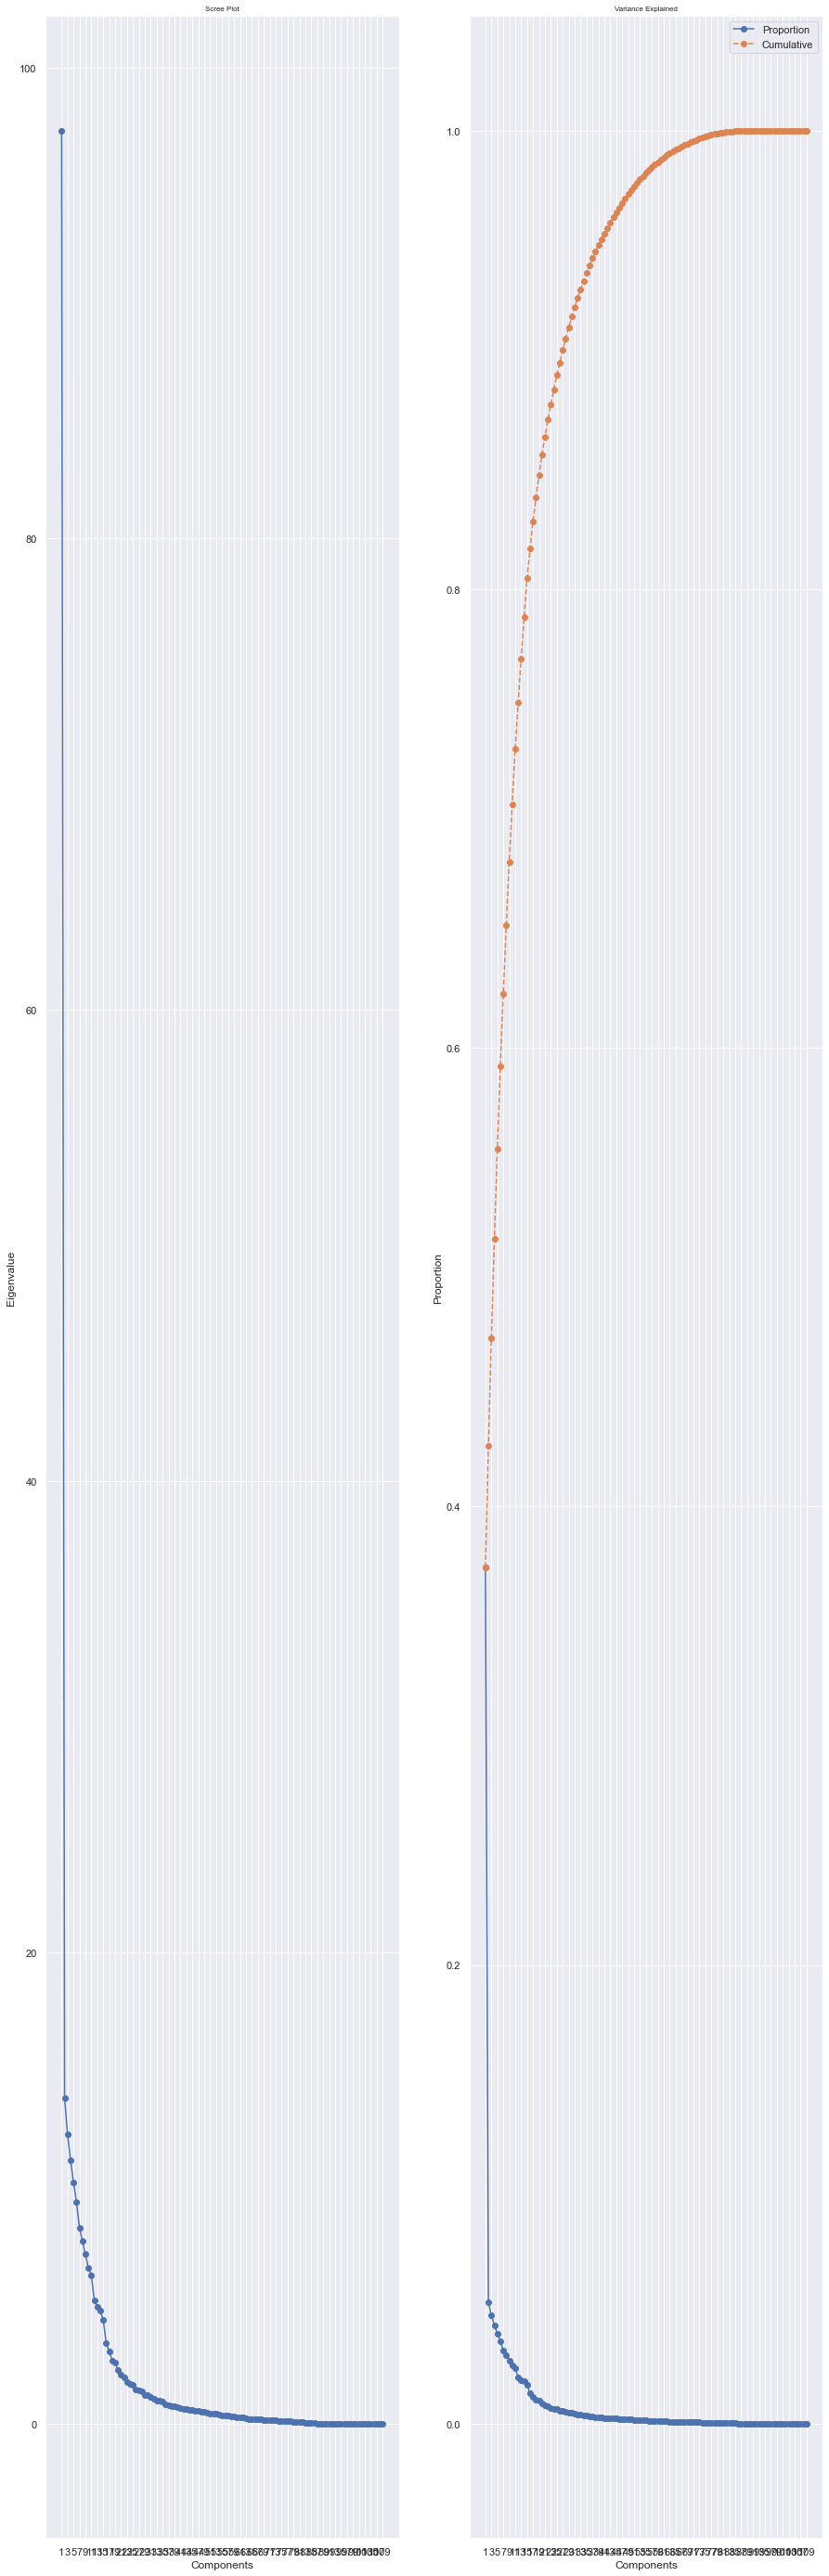

In [125]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 50))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=8)
ax2.set_title("Variance Explained", fontsize=8)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

In [126]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=63)
pca_feat1 = pca.fit_transform(df_pca1[metric_features])
pca_feat_names1 = [f"PC{i}" for i in range(pca.n_components_)]
pca_df1 = pd.DataFrame(pca_feat1, index=df_pca1.index, columns=pca_feat_names1)  # remember index=df_pca.index
pca_df1

PC0       PC1       PC2        PC3       PC4       PC5  \
CONTROLN                                                                 
95515     -3.911076 -1.332099 -0.186069  -0.777647 -0.098367  0.729432   
148535    48.975541  0.490398  0.040413  -0.200594 -0.610976 -2.316896   
15078     -4.034931 -0.347587 -0.343633  -0.662689  0.172211 -0.254478   
172556     2.097179  2.629923 -1.684399  -1.005603 -3.068890 -2.062130   
47784     -2.950364  0.540178  0.177309  -0.172181 -1.309755 -3.780889   
...             ...       ...       ...        ...       ...       ...   
184568    -2.756747  3.226006  4.406157   2.237106 -3.229178 -6.038733   
122706     2.113650 -4.114626  0.491128   0.473293 -1.569039 -3.965401   
189641    -4.300580  1.841288 -1.411820  -0.835115 -0.336388  0.051924   
4693       4.672823 -1.925536  0.557594   3.732305 -3.282530 -0.776521   
185114    -1.776396 -2.354394  1.264271  35.247343  4.813896  0.108154   

               PC6       PC7       PC8       PC9  ...      PC53      PC54  \
CONTROLN                                          ...                       
95515    -1.527695 -1.210982  1.246664 -2.257166  ...  0.370503 -0.192576   
148535   -0.831510  1.059293 -3.090805  1.516073  ... -1.730533 -0.262120   
15078    -1.382123 -0.841276  3.224752 -0.098862  ...  0.855241  0.359387   
172556    0.896532 -2.842525 -1.345572 -3.052210  ...  1.318073 -0.032891   
47784    -0.233929  0.540012  4.541678  4.789115  ...  0.132482  0.089715   
...            ...       ...       ...       ...  ...       ...       ...   
184568    1.883136  2.071733  5.556505  8.032672  ...  0.212488  0.419485   
122706   -2.345548  1.853968 -5.368821  5.070748  ... -0.746454 -0.214418   
189641   -1.714200 -0.101873  0.419152 -2.471062  ... -1.778345  0.988214   
4693      1.023738 -0.790371  0.916118 -5.755129  ... -0.481694 -0.511989   
185114   -1.277345 -0.179786  3.960584 -6.842063  ... -0.180435 -0.515656   

              PC55      PC56      PC57      PC58      PC59       PC60  \
CONTROLN                                                                
95515    -0.129153  0.385566  0.127723 -0.132479 -0.828295  -0.227330   
148535    0.097644 -0.521098  0.090780  0.353147  0.166010   0.020777   
15078     0.389165  0.847766  0.507419  0.529819 -0.386677   0.133134   
172556    1.413761 -0.324789  0.455573  0.886660 -1.540525  -0.109463   
47784     0.005300  0.390150  0.148883 -0.137169 -0.033835   0.155180   
...            ...       ...       ...       ...       ...        ...   
184568    0.333484 -0.634215  0.134794  0.250060  0.527355   0.261725   
122706   -0.442391  0.510276  0.674312 -0.916019  0.008205  -0.318736   
189641    0.501738 -0.303746  0.804854  0.422090  0.984373   0.273350   
4693      0.241568  0.218965  0.063534  0.930179 -0.490013   0.171295   
185114    0.204181  0.324053 -0.087782 -0.430069  1.480279 -14.127077   

               PC61      PC62  
CONTROLN                       
95515      0.436345  0.113576  
148535     0.169992 -0.051085  
15078     -0.141265 -0.370571  
172556     0.533378  0.142551  
47784     -0.584473 -0.047584  
...             ...       ...  
184568    -0.294890  0.240255  
122706     0.037125  0.840033  
189641    -0.500470 -1.849957  
4693      -0.307886 -0.489357  
185114   -14.165932 -1.163316  

[93014 rows x 63 columns]

In [127]:
# Reassigning df to contain pca variables

df_pca1 = pd.concat([df_pca1, pca_df1], axis=1)
df_pca1.head()

TCODE STATE    ZIP  RECPGVG  RECSWEEP  CHILD03  CHILD07  CHILD12  \
CONTROLN                                                                    
95515        0    IL  61081        0         0        0        0        0   
148535       1    CA  91326        0         0        0        0        0   
15078        1    NC  27017        0         0        0        0        0   
172556       0    CA  95953        0         0        0        0        0   
47784        0    AL  35603        0         0        0        0        0   

          CHILD18  INCOME  ...      PC53      PC54      PC55      PC56  \
CONTROLN                   ...                                           
95515           0       4  ...  0.370503 -0.192576 -0.129153  0.385566   
148535          1       6  ... -1.730533 -0.262120  0.097644 -0.521098   
15078           0       3  ...  0.855241  0.359387  0.389165  0.847766   
172556          0       1  ...  1.318073 -0.032891  1.413761 -0.324789   
47784           0       5  ...  0.132482  0.089715  0.005300  0.390150   

              PC57      PC58      PC59      PC60      PC61      PC62  
CONTROLN                                                              
95515     0.127723 -0.132479 -0.828295 -0.227330  0.436345  0.113576  
148535    0.090780  0.353147  0.166010  0.020777  0.169992 -0.051085  
15078     0.507419  0.529819 -0.386677  0.133134 -0.141265 -0.370571  
172556    0.455573  0.886660 -1.540525 -0.109463  0.533378  0.142551  
47784     0.148883 -0.137169 -0.033835  0.155180 -0.584473 -0.047584  

[5 rows x 224 columns]

In [128]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df_pca1[metric_features + pca_feat_names1].corr().loc[metric_features, pca_feat_names1]
loadings.style.applymap(_color_red_or_green)

In [129]:
#donors = pd.concat([donors.drop(metric_features, axis=1, inplace=True), pca_df1], axis=1)

# PCA

In [130]:
#This pca will be better

In [131]:
df_pca = donors.copy()

In [132]:
# Use PCA to reduce dimensionality of data
from sklearn.decomposition import PCA
pca = PCA()
pca_feat = pca.fit_transform(df_pca[metric_features])
pca_feat  

array([[-8.04550088e-01,  4.11221921e-01,  4.85527773e-02, ...,
        -4.39813474e-03,  3.31892742e-03, -4.37520333e-06],
       [ 1.72750124e+00,  5.61288531e-01,  2.42989628e-01, ...,
         4.18744576e-03,  2.45538956e-03,  1.13088811e-03],
       [-9.64323869e-01,  5.08650236e-01, -2.55803131e-01, ...,
        -1.19956810e-03,  3.16627703e-03, -8.51902374e-04],
       ...,
       [-4.94923869e-01, -8.24067113e-01, -1.53997320e-01, ...,
        -4.26330999e-03,  3.04078669e-03, -9.07289044e-04],
       [ 1.39525383e+00,  3.86807510e-01,  8.25291533e-02, ...,
         7.28104089e-03,  6.86541171e-05,  8.19066283e-04],
       [ 4.94545880e-01, -1.92408896e-01, -3.19016700e-01, ...,
        -4.84121463e-03,  5.07715451e-05, -7.56380827e-03]])

In [133]:
# In PCA we decompose the covariance matrix of the data 

cov_matrix = df_pca[metric_features].cov()
cov_matrix

HIT    POP901   POP90C1   POP90C2   POP90C3   POP90C4  \
HIT           0.030258 -0.000804  0.006588  0.000907 -0.006883  0.000021   
POP901       -0.000804  0.003364 -0.000106  0.000324  0.000129  0.000219   
POP90C1       0.006588 -0.000106  0.229732 -0.080657 -0.144591  0.000404   
POP90C2       0.000907  0.000324 -0.080657  0.099347 -0.017006 -0.000494   
POP90C3      -0.006883  0.000129 -0.144591 -0.017006  0.164217  0.004088   
...                ...       ...       ...       ...       ...       ...   
AGE           0.003359 -0.000154 -0.000451  0.002057 -0.001407 -0.000379   
number_child  0.001333 -0.000107  0.000937 -0.000064 -0.000769  0.000103   
TENURE        0.001051 -0.000076 -0.001750  0.000911  0.000938 -0.000066   
INACTIVITY   -0.000655 -0.000060 -0.000208 -0.000585  0.000690  0.000058   
PROMUSE       0.000577  0.000056  0.000215  0.000523 -0.000646 -0.000055   

                   POP90C5      ETH1      ETH2          ETH3  ...  \
HIT           6.099645e-04  0.001638 -0.000397 -1.729599e-04  ...   
POP901        5.582334e-05 -0.000516  0.000310  2.484801e-05  ...   
POP90C1       4.526758e-03 -0.014329  0.007661 -1.787055e-03  ...   
POP90C2       1.641891e-03  0.004843 -0.001659  6.375623e-04  ...   
POP90C3      -1.867726e-03  0.016725 -0.005437  1.219005e-03  ...   
...                    ...       ...       ...           ...  ...   
AGE           5.658709e-04  0.000793 -0.000220  6.861794e-08  ...   
number_child -5.784290e-07  0.000299 -0.000086 -4.566751e-05  ...   
TENURE        1.512639e-04  0.000920 -0.000375 -1.016380e-05  ...   
INACTIVITY   -1.540854e-04 -0.000354  0.000236  3.240635e-05  ...   
PROMUSE       1.399376e-04  0.000334 -0.000221 -3.105867e-05  ...   

                  MINRAMNT      MAXRAMNT  LASTGIFT       TIMELAG   AVGGIFT  \
HIT          -5.998171e-05 -4.786689e-06 -0.000028  1.188886e-05 -0.000043   
POP901        8.768057e-06  2.248815e-06  0.000006 -2.466669e-06  0.000010   
POP90C1       1.992455e-04  5.400282e-05  0.000246  1.572806e-05  0.000251   
POP90C2      -8.092813e-05 -2.430950e-05 -0.000108 -8.156977e-06 -0.000105   
POP90C3      -1.258573e-04 -3.237902e-05 -0.000152 -6.751747e-06 -0.000156   
...                    ...           ...       ...           ...       ...   
AGE          -1.196471e-04 -1.088860e-05 -0.000079 -2.584127e-07 -0.000094   
number_child -6.464228e-07 -2.836570e-06 -0.000008  4.356455e-06 -0.000007   
TENURE       -2.436394e-04 -1.378437e-06 -0.000080  4.008984e-05 -0.000159   
INACTIVITY    1.106998e-04  8.374726e-07  0.000169  2.300194e-05  0.000070   
PROMUSE      -1.017340e-04 -7.919995e-07 -0.000156 -2.116731e-05 -0.000065   

                   AGE  number_child    TENURE  INACTIVITY   PROMUSE  
HIT           0.003359      0.001333  0.001051   -0.000655  0.000577  
POP901       -0.000154     -0.000107 -0.000076   -0.000060  0.000056  
POP90C1      -0.000451      0.000937 -0.001750   -0.000208  0.000215  
POP90C2       0.002057     -0.000064  0.000911   -0.000585  0.000523  
POP90C3      -0.001407     -0.000769  0.000938    0.000690 -0.000646  
...                ...           ...       ...         ...       ...  
AGE           0.027686     -0.002212  0.002254   -0.001816  0.001673  
number_child -0.002212      0.005176 -0.000165    0.000171 -0.000163  
TENURE        0.002254     -0.000165  0.004575   -0.000204  0.000184  
INACTIVITY   -0.001816      0.000171 -0.000204    0.029505 -0.027144  
PROMUSE       0.001673     -0.000163  0.000184   -0.027144  0.025003  

[109 rows x 109 columns]

In [134]:
# Composing back the covariance matrix
pd.DataFrame(pca.components_.T @ np.diag(pca.explained_variance_) @ pca.components_, 
             index=cov_matrix.index, 
             columns=cov_matrix.columns)

HIT    POP901   POP90C1   POP90C2   POP90C3   POP90C4  \
HIT           0.030258 -0.000804  0.006588  0.000907 -0.006883  0.000021   
POP901       -0.000804  0.003364 -0.000106  0.000324  0.000129  0.000219   
POP90C1       0.006588 -0.000106  0.229732 -0.080657 -0.144591  0.000404   
POP90C2       0.000907  0.000324 -0.080657  0.099347 -0.017006 -0.000494   
POP90C3      -0.006883  0.000129 -0.144591 -0.017006  0.164217  0.004088   
...                ...       ...       ...       ...       ...       ...   
AGE           0.003359 -0.000154 -0.000451  0.002057 -0.001407 -0.000379   
number_child  0.001333 -0.000107  0.000937 -0.000064 -0.000769  0.000103   
TENURE        0.001051 -0.000076 -0.001750  0.000911  0.000938 -0.000066   
INACTIVITY   -0.000655 -0.000060 -0.000208 -0.000585  0.000690  0.000058   
PROMUSE       0.000577  0.000056  0.000215  0.000523 -0.000646 -0.000055   

                   POP90C5      ETH1      ETH2          ETH3  ...  \
HIT           6.099645e-04  0.001638 -0.000397 -1.729599e-04  ...   
POP901        5.582334e-05 -0.000516  0.000310  2.484801e-05  ...   
POP90C1       4.526758e-03 -0.014329  0.007661 -1.787055e-03  ...   
POP90C2       1.641891e-03  0.004843 -0.001659  6.375623e-04  ...   
POP90C3      -1.867726e-03  0.016725 -0.005437  1.219005e-03  ...   
...                    ...       ...       ...           ...  ...   
AGE           5.658709e-04  0.000793 -0.000220  6.861794e-08  ...   
number_child -5.784290e-07  0.000299 -0.000086 -4.566751e-05  ...   
TENURE        1.512639e-04  0.000920 -0.000375 -1.016380e-05  ...   
INACTIVITY   -1.540854e-04 -0.000354  0.000236  3.240635e-05  ...   
PROMUSE       1.399376e-04  0.000334 -0.000221 -3.105867e-05  ...   

                  MINRAMNT      MAXRAMNT  LASTGIFT       TIMELAG   AVGGIFT  \
HIT          -5.998171e-05 -4.786689e-06 -0.000028  1.188886e-05 -0.000043   
POP901        8.768057e-06  2.248815e-06  0.000006 -2.466669e-06  0.000010   
POP90C1       1.992455e-04  5.400282e-05  0.000246  1.572806e-05  0.000251   
POP90C2      -8.092813e-05 -2.430950e-05 -0.000108 -8.156977e-06 -0.000105   
POP90C3      -1.258573e-04 -3.237902e-05 -0.000152 -6.751747e-06 -0.000156   
...                    ...           ...       ...           ...       ...   
AGE          -1.196471e-04 -1.088860e-05 -0.000079 -2.584127e-07 -0.000094   
number_child -6.464228e-07 -2.836570e-06 -0.000008  4.356455e-06 -0.000007   
TENURE       -2.436394e-04 -1.378437e-06 -0.000080  4.008984e-05 -0.000159   
INACTIVITY    1.106998e-04  8.374726e-07  0.000169  2.300194e-05  0.000070   
PROMUSE      -1.017340e-04 -7.919995e-07 -0.000156 -2.116731e-05 -0.000065   

                   AGE  number_child    TENURE  INACTIVITY   PROMUSE  
HIT           0.003359      0.001333  0.001051   -0.000655  0.000577  
POP901       -0.000154     -0.000107 -0.000076   -0.000060  0.000056  
POP90C1      -0.000451      0.000937 -0.001750   -0.000208  0.000215  
POP90C2       0.002057     -0.000064  0.000911   -0.000585  0.000523  
POP90C3      -0.001407     -0.000769  0.000938    0.000690 -0.000646  
...                ...           ...       ...         ...       ...  
AGE           0.027686     -0.002212  0.002254   -0.001816  0.001673  
number_child -0.002212      0.005176 -0.000165    0.000171 -0.000163  
TENURE        0.002254     -0.000165  0.004575   -0.000204  0.000184  
INACTIVITY   -0.001816      0.000171 -0.000204    0.029505 -0.027144  
PROMUSE       0.001673     -0.000163  0.000184   -0.027144  0.025003  

[109 rows x 109 columns]

In [135]:
# Obtaining the projected observations on the principal components axes (linear combinations)
pd.DataFrame(df_pca[metric_features].values @ pca.components_.T, 
             index=df_pca.index,
             columns=[f"PC{i}" for i in range(pca.n_components_)])

PC0       PC1       PC2       PC3       PC4       PC5  \
CONTROLN                                                               
95515     0.190931  1.081429 -0.692968 -1.029063 -0.470488  0.330301   
148535    2.722982  1.231496 -0.498531 -0.597009 -1.003993  0.657206   
15078     0.031157  1.178857 -0.997324 -0.682025 -0.414763  0.311942   
172556    0.819688  1.357165 -0.641111 -0.531438 -0.199144 -0.220270   
47784     1.108460  0.533271 -1.063316 -1.096278 -0.471279  0.121152   
...            ...       ...       ...       ...       ...       ...   
184568    1.562143  0.368227 -0.906540 -1.089033 -0.219140  0.076149   
122706    2.125460  0.939943 -0.898239 -1.120814 -0.681960  0.257537   
189641    0.500557 -0.153860 -0.895518 -0.752263 -0.665632  0.614321   
4693      2.390735  1.057015 -0.658992 -0.841130 -0.658374  0.568407   
185114    1.490027  0.477798 -1.060538 -1.277869 -0.297745  0.397535   

               PC6       PC7       PC8       PC9  ...      PC99     PC100  \
CONTROLN                                          ...                       
95515     0.113334 -1.660179  0.499815  0.748370  ... -0.012608  0.005304   
148535    0.015369 -1.403814  0.663329  0.963593  ... -0.020057 -0.002605   
15078     0.129838 -1.804135  0.579865  0.736151  ... -0.015214  0.002761   
172556    0.250181 -1.987158  0.556530  0.870545  ... -0.013527  0.006734   
47784    -0.218889 -1.773498  0.669522  0.616534  ... -0.011737  0.001794   
...            ...       ...       ...       ...  ...       ...       ...   
184568    0.200559 -1.614921  0.652940  0.675877  ... -0.007708  0.001934   
122706    0.216196 -1.590398  0.698386  0.681420  ... -0.010471  0.007140   
189641    0.632718 -1.665462  0.578107  0.463063  ... -0.015466  0.002149   
4693      0.913049 -1.553862  0.498638  0.608549  ... -0.011173 -0.001251   
185114    0.888056 -1.359450  0.733952  0.861829  ... -0.024720 -0.002438   

             PC101     PC102     PC103     PC104     PC105     PC106  \
CONTROLN                                                               
95515    -0.003142  0.001696  0.665854 -0.137443  0.030963 -0.007261   
148535   -0.009885  0.007064  0.666771 -0.136875  0.031170  0.001325   
15078    -0.003301  0.002509  0.666147 -0.135027  0.033200 -0.004062   
172556    0.007134 -0.002294  0.667795 -0.130718  0.031358  0.001197   
47784    -0.002748  0.005940  0.667212 -0.135207  0.030051 -0.001255   
...            ...       ...       ...       ...       ...       ...   
184568   -0.002258  0.005753  0.664486 -0.142010  0.029179  0.003356   
122706   -0.005157 -0.002407  0.664713 -0.134186  0.029611 -0.005120   
189641   -0.001922  0.002312  0.666281 -0.137501  0.030289 -0.007126   
4693     -0.000152  0.000746  0.667030 -0.137919  0.025469  0.004418   
185114    0.000208 -0.001043  0.663009 -0.139362 -0.089670 -0.007704   

             PC107     PC108  
CONTROLN                      
95515     0.003301  0.007396  
148535    0.002438  0.008531  
15078     0.003149  0.006548  
172556    0.001218  0.007270  
47784     0.002925  0.007839  
...            ...       ...  
184568    0.002718  0.008075  
122706   -0.003364  0.007918  
189641    0.003023  0.006493  
4693      0.000051  0.008219  
185114    0.000033 -0.000164  

[93014 rows x 109 columns]

In [136]:
# Output PCA table
output=pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)
output

Eigenvalue    Difference  Proportion  Cumulative
1      0.641301  0.000000e+00    0.339401    0.339401
2      0.289757 -3.515441e-01    0.153350    0.492751
3      0.144665 -1.450914e-01    0.076562    0.569313
4      0.118337 -2.632829e-02    0.062628    0.631941
5      0.075777 -4.255962e-02    0.040104    0.672046
..          ...           ...         ...         ...
105    0.000015 -4.831358e-07    0.000008    0.999983
106    0.000013 -2.477954e-06    0.000007    0.999990
107    0.000009 -3.725835e-06    0.000005    0.999995
108    0.000006 -2.942287e-06    0.000003    0.999999
109    0.000003 -3.625581e-06    0.000001    1.000000

[109 rows x 4 columns]

In [137]:
output.loc[output['Cumulative'] >= 0.99]

Eigenvalue    Difference  Proportion  Cumulative
60     0.001240 -4.789413e-05    0.000656    0.990031
61     0.001208 -3.277430e-05    0.000639    0.990670
62     0.001153 -5.462742e-05    0.000610    0.991280
63     0.001087 -6.581957e-05    0.000575    0.991856
64     0.000998 -8.875890e-05    0.000528    0.992384
65     0.000885 -1.134864e-04    0.000468    0.992852
66     0.000802 -8.313795e-05    0.000424    0.993277
67     0.000767 -3.431820e-05    0.000406    0.993683
68     0.000754 -1.342251e-05    0.000399    0.994082
69     0.000706 -4.818877e-05    0.000374    0.994455
70     0.000679 -2.709643e-05    0.000359    0.994815
71     0.000655 -2.334302e-05    0.000347    0.995161
72     0.000621 -3.483307e-05    0.000328    0.995490
73     0.000576 -4.451274e-05    0.000305    0.995795
74     0.000552 -2.426121e-05    0.000292    0.996087
75     0.000515 -3.680909e-05    0.000273    0.996359
76     0.000510 -5.252712e-06    0.000270    0.996629
77     0.000503 -6.346255e-06    0.000266    0.996896
78     0.000485 -1.807759e-05    0.000257    0.997152
79     0.000470 -1.576817e-05    0.000248    0.997401
80     0.000441 -2.855934e-05    0.000233    0.997634
81     0.000438 -3.026360e-06    0.000232    0.997866
82     0.000375 -6.249962e-05    0.000199    0.998065
83     0.000370 -5.905486e-06    0.000196    0.998260
84     0.000343 -2.656384e-05    0.000182    0.998442
85     0.000322 -2.075425e-05    0.000171    0.998612
86     0.000319 -2.743339e-06    0.000169    0.998781
87     0.000274 -4.597060e-05    0.000145    0.998926
88     0.000263 -1.079714e-05    0.000139    0.999065
89     0.000255 -7.477549e-06    0.000135    0.999200
90     0.000221 -3.461783e-05    0.000117    0.999317
91     0.000205 -1.568796e-05    0.000108    0.999425
92     0.000187 -1.811548e-05    0.000099    0.999524
93     0.000156 -3.065469e-05    0.000083    0.999607
94     0.000140 -1.605775e-05    0.000074    0.999681
95     0.000136 -3.832995e-06    0.000072    0.999753
96     0.000113 -2.373258e-05    0.000060    0.999813
97     0.000060 -5.264569e-05    0.000032    0.999845
98     0.000050 -9.813790e-06    0.000027    0.999871
99     0.000048 -1.930312e-06    0.000025    0.999896
100    0.000044 -4.224678e-06    0.000023    0.999920
101    0.000039 -5.144635e-06    0.000021    0.999940
102    0.000026 -1.318998e-05    0.000014    0.999954
103    0.000025 -9.395245e-07    0.000013    0.999967
104    0.000016 -8.702229e-06    0.000008    0.999975
105    0.000015 -4.831358e-07    0.000008    0.999983
106    0.000013 -2.477954e-06    0.000007    0.999990
107    0.000009 -3.725835e-06    0.000005    0.999995
108    0.000006 -2.942287e-06    0.000003    0.999999
109    0.000003 -3.625581e-06    0.000001    1.000000

<ipython-input-138-eca28bfdc977>:22: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-138-eca28bfdc977>:24: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  print(fig.show())


None


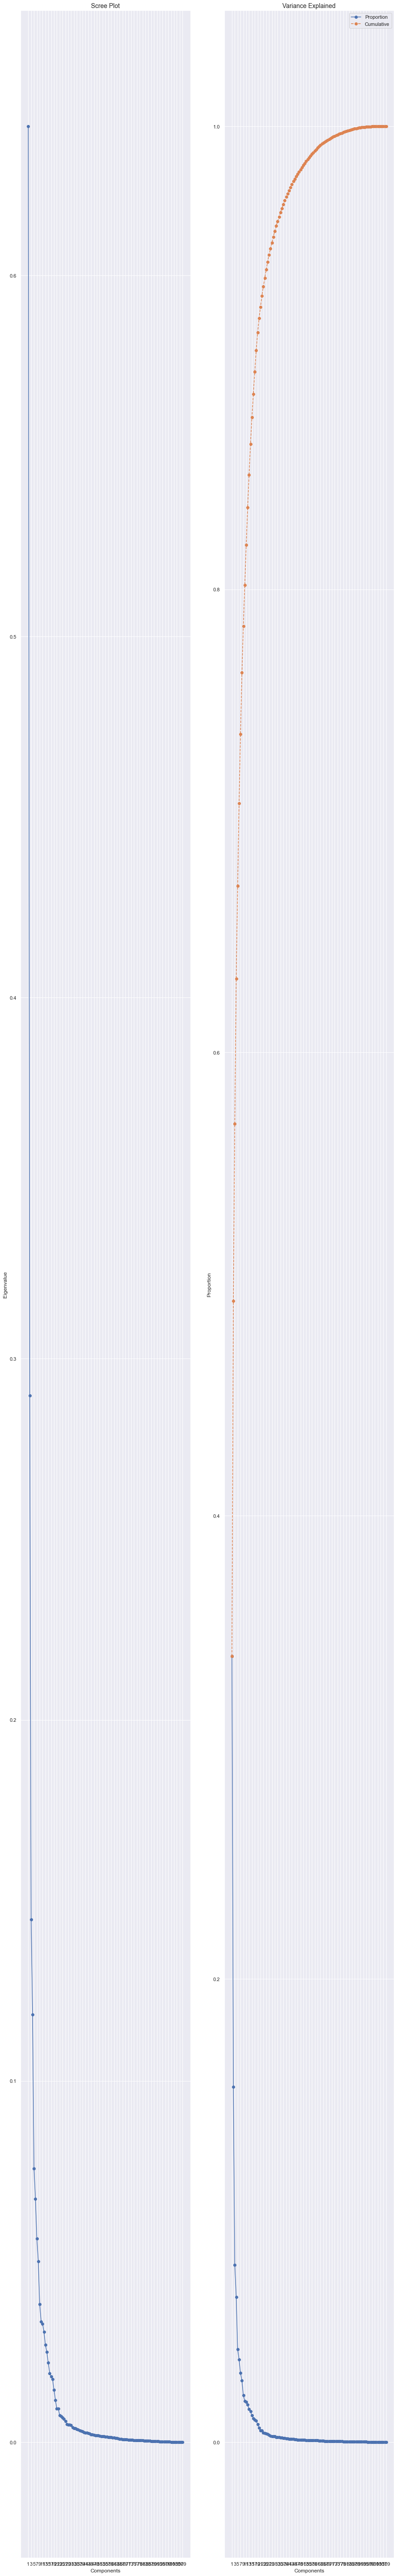

In [138]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 105))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)


In [139]:
# Perform PCA again with the number of principal components you want to retain
pca = PCA(n_components=88)
pca_feat = pca.fit_transform(df_pca[metric_features])
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df

PC0       PC1       PC2       PC3       PC4       PC5  \
CONTROLN                                                               
95515    -0.804550  0.411222  0.048553 -0.109484 -0.129928  0.066252   
148535    1.727501  0.561289  0.242990  0.322570 -0.663432  0.393157   
15078    -0.964324  0.508650 -0.255803  0.237554 -0.074202  0.047893   
172556   -0.175793  0.686958  0.100410  0.388140  0.141417 -0.484318   
47784     0.112979 -0.136936 -0.321795 -0.176699 -0.130718 -0.142896   
...            ...       ...       ...       ...       ...       ...   
184568    0.566662 -0.301980 -0.165019 -0.169454  0.121420 -0.187900   
122706    1.129979  0.269736 -0.156718 -0.201235 -0.341399 -0.006512   
189641   -0.494924 -0.824067 -0.153997  0.167316 -0.325071  0.350272   
4693      1.395254  0.386808  0.082529  0.078448 -0.317813  0.304358   
185114    0.494546 -0.192409 -0.319017 -0.358291  0.042816  0.133487   

               PC6       PC7       PC8       PC9  ...      PC78      PC79  \
CONTROLN                                          ...                       
95515     0.039627  0.028781 -0.146013  0.076250  ... -0.007469 -0.009709   
148535   -0.058337  0.285146  0.017502  0.291473  ...  0.001384 -0.004454   
15078     0.056132 -0.115175 -0.065963  0.064031  ... -0.000437  0.006290   
172556    0.176475 -0.298198 -0.089298  0.198424  ... -0.027926 -0.004564   
47784    -0.292595 -0.084538  0.023694 -0.055587  ...  0.014377  0.009197   
...            ...       ...       ...       ...  ...       ...       ...   
184568    0.126852  0.074040  0.007112  0.003756  ...  0.005719  0.006947   
122706    0.142490  0.098562  0.052559  0.009300  ... -0.065320 -0.017580   
189641    0.559012  0.023498 -0.067721 -0.209057  ... -0.020255 -0.013420   
4693      0.839342  0.135098 -0.147189 -0.063572  ...  0.005153  0.005354   
185114    0.814349  0.329511  0.088125  0.189709  ... -0.000100  0.002069   

              PC80      PC81      PC82      PC83      PC84      PC85  \
CONTROLN                                                               
95515     0.005733 -0.001614  0.000039  0.004234 -0.000210 -0.005452   
148535    0.044948 -0.130536  0.062701 -0.014471  0.155043 -0.061188   
15078     0.008112 -0.000660 -0.002276 -0.007510  0.001995  0.000268   
172556   -0.017452  0.044787 -0.035446 -0.025838 -0.012044  0.006171   
47784    -0.020312 -0.000232 -0.000064  0.001095  0.001150 -0.002322   
...            ...       ...       ...       ...       ...       ...   
184568    0.013762 -0.003953 -0.003145  0.007486  0.011864 -0.000089   
122706    0.036531 -0.005379 -0.011688  0.011545 -0.016429 -0.024534   
189641    0.031915 -0.002305 -0.003721 -0.008286  0.006924  0.014508   
4693      0.025818 -0.016460 -0.012187  0.014538 -0.008107 -0.006041   
185114   -0.004023  0.002384  0.008439  0.211856  0.000703 -0.008226   

              PC86      PC87  
CONTROLN                      
95515     0.008728 -0.009277  
148535    0.004283  0.022046  
15078     0.011441 -0.006837  
172556    0.008991 -0.040039  
47784    -0.008255  0.016550  
...            ...       ...  
184568    0.010348 -0.001315  
122706   -0.001452  0.001600  
189641   -0.000635 -0.012714  
4693      0.004866 -0.005724  
185114    0.123307 -0.009387  

[93014 rows x 88 columns]

In [140]:
# Reassigning df to contain pca variables

df_pca = pd.concat([df_pca, pca_df], axis=1)
df_pca.head()

TCODE STATE    ZIP  RECPGVG  RECSWEEP  CHILD03  CHILD07  CHILD12  \
CONTROLN                                                                    
95515        0    IL  61081        0         0        0        0        0   
148535       1    CA  91326        0         0        0        0        0   
15078        1    NC  27017        0         0        0        0        0   
172556       0    CA  95953        0         0        0        0        0   
47784        0    AL  35603        0         0        0        0        0   

          CHILD18  INCOME  ...      PC78      PC79      PC80      PC81  \
CONTROLN                   ...                                           
95515           0       4  ... -0.007469 -0.009709  0.005733 -0.001614   
148535          1       6  ...  0.001384 -0.004454  0.044948 -0.130536   
15078           0       3  ... -0.000437  0.006290  0.008112 -0.000660   
172556          0       1  ... -0.027926 -0.004564 -0.017452  0.044787   
47784           0       5  ...  0.014377  0.009197 -0.020312 -0.000232   

              PC82      PC83      PC84      PC85      PC86      PC87  
CONTROLN                                                              
95515     0.000039  0.004234 -0.000210 -0.005452  0.008728 -0.009277  
148535    0.062701 -0.014471  0.155043 -0.061188  0.004283  0.022046  
15078    -0.002276 -0.007510  0.001995  0.000268  0.011441 -0.006837  
172556   -0.035446 -0.025838 -0.012044  0.006171  0.008991 -0.040039  
47784    -0.000064  0.001095  0.001150 -0.002322 -0.008255  0.016550  

[5 rows x 249 columns]

In [141]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df_pca[metric_features + pca_feat_names].corr().loc[metric_features, pca_feat_names]
loadings.style.applymap(_color_red_or_green)

In [142]:
#donors = pd.concat([donors.drop(metric_features, axis=1, inplace=True), pca_df], axis=1)

# Multiple correspondence analysis

In [143]:
import prince
ohc_donors

TCODE_1  TCODE_100  TCODE_116  TCODE_12  TCODE_13  TCODE_134  \
CONTROLN                                                                 
95515         0.0        0.0        0.0       0.0       0.0        0.0   
148535        1.0        0.0        0.0       0.0       0.0        0.0   
15078         1.0        0.0        0.0       0.0       0.0        0.0   
172556        0.0        0.0        0.0       0.0       0.0        0.0   
47784         0.0        0.0        0.0       0.0       0.0        0.0   
...           ...        ...        ...       ...       ...        ...   
184568        1.0        0.0        0.0       0.0       0.0        0.0   
122706        1.0        0.0        0.0       0.0       0.0        0.0   
189641        1.0        0.0        0.0       0.0       0.0        0.0   
4693          0.0        0.0        0.0       0.0       0.0        0.0   
185114        0.0        0.0        0.0       0.0       0.0        0.0   

          TCODE_136  TCODE_14  TCODE_17  TCODE_18  ...  RFA_2A_2.0  \
CONTROLN                                           ...               
95515           0.0       0.0       0.0       0.0  ...         1.0   
148535          0.0       0.0       0.0       0.0  ...         0.0   
15078           0.0       0.0       0.0       0.0  ...         1.0   
172556          0.0       0.0       0.0       0.0  ...         1.0   
47784           0.0       0.0       0.0       0.0  ...         0.0   
...             ...       ...       ...       ...  ...         ...   
184568          0.0       0.0       0.0       0.0  ...         0.0   
122706          0.0       0.0       0.0       0.0  ...         0.0   
189641          0.0       0.0       0.0       0.0  ...         1.0   
4693            0.0       0.0       0.0       0.0  ...         0.0   
185114          0.0       0.0       0.0       0.0  ...         0.0   

          RFA_2A_3.0  RFA_2A_4.0  urbanicity_level_neighbourhood_2  \
CONTROLN                                                             
95515            0.0         0.0                               0.0   
148535           0.0         1.0                               0.0   
15078            0.0         0.0                               0.0   
172556           0.0         0.0                               1.0   
47784            1.0         0.0                               0.0   
...              ...         ...                               ...   
184568           0.0         1.0                               0.0   
122706           1.0         0.0                               0.0   
189641           0.0         0.0                               0.0   
4693             1.0         0.0                               1.0   
185114           0.0         1.0                               1.0   

          urbanicity_level_neighbourhood_3  urbanicity_level_neighbourhood_4  \
CONTROLN                                                                       
95515                                  1.0                               0.0   
148535                                 0.0                               1.0   
15078                                  0.0                               0.0   
172556                                 0.0                               0.0   
47784                                  0.0                               0.0   
...                                    ...                               ...   
184568                                 0.0                               1.0   
122706                                 1.0                               0.0   
189641                                 1.0                               0.0   
4693                                   0.0                               0.0   
185114                                 0.0                               0.0   

          urbanicity_level_neighbourhood_5  socio_econ_neighbourhood_2  \
CONTROLN                                                                 
95515                               

In [144]:
ohc_donors[['MDMAUD_R_D', 'MDMAUD_R_I', 'MDMAUD_R_L', 'MDMAUD_R_X','MDMAUD_F_2', 'MDMAUD_F_5', 'MDMAUD_F_X', 'MDMAUD_A_L','MDMAUD_A_M', 'MDMAUD_A_T', 'MDMAUD_A_X']]=donors[['MDMAUD_R_D', 'MDMAUD_R_I', 'MDMAUD_R_L', 'MDMAUD_R_X','MDMAUD_F_2', 'MDMAUD_F_5', 'MDMAUD_F_X', 'MDMAUD_A_L','MDMAUD_A_M', 'MDMAUD_A_T', 'MDMAUD_A_X']]

In [145]:
ohc_donors

TCODE_1  TCODE_100  TCODE_116  TCODE_12  TCODE_13  TCODE_134  \
CONTROLN                                                                 
95515         0.0        0.0        0.0       0.0       0.0        0.0   
148535        1.0        0.0        0.0       0.0       0.0        0.0   
15078         1.0        0.0        0.0       0.0       0.0        0.0   
172556        0.0        0.0        0.0       0.0       0.0        0.0   
47784         0.0        0.0        0.0       0.0       0.0        0.0   
...           ...        ...        ...       ...       ...        ...   
184568        1.0        0.0        0.0       0.0       0.0        0.0   
122706        1.0        0.0        0.0       0.0       0.0        0.0   
189641        1.0        0.0        0.0       0.0       0.0        0.0   
4693          0.0        0.0        0.0       0.0       0.0        0.0   
185114        0.0        0.0        0.0       0.0       0.0        0.0   

          TCODE_136  TCODE_14  TCODE_17  TCODE_18  ...  MDMAUD_R_I  \
CONTROLN                                           ...               
95515           0.0       0.0       0.0       0.0  ...         0.0   
148535          0.0       0.0       0.0       0.0  ...         0.0   
15078           0.0       0.0       0.0       0.0  ...         0.0   
172556          0.0       0.0       0.0       0.0  ...         0.0   
47784           0.0       0.0       0.0       0.0  ...         0.0   
...             ...       ...       ...       ...  ...         ...   
184568          0.0       0.0       0.0       0.0  ...         0.0   
122706          0.0       0.0       0.0       0.0  ...         0.0   
189641          0.0       0.0       0.0       0.0  ...         0.0   
4693            0.0       0.0       0.0       0.0  ...         0.0   
185114          0.0       0.0       0.0       0.0  ...         0.0   

          MDMAUD_R_L  MDMAUD_R_X  MDMAUD_F_2  MDMAUD_F_5  MDMAUD_F_X  \
CONTROLN                                                               
95515            0.0         1.0         0.0         0.0         1.0   
148535           0.0         1.0         0.0         0.0         1.0   
15078            0.0         1.0         0.0         0.0         1.0   
172556           0.0         1.0         0.0         0.0         1.0   
47784            0.0         1.0         0.0         0.0         1.0   
...              ...         ...         ...         ...         ...   
184568           0.0         1.0         0.0         0.0         1.0   
122706           0.0         1.0         0.0         0.0         1.0   
189641           0.0         1.0         0.0         0.0         1.0   
4693             0.0         1.0         0.0         0.0         1.0   
185114           0.0         0.0         0.0         0.0         0.0   

          MDMAUD_A_L  MDMAUD_A_M  MDMAUD_A_T  MDMAUD_A_X  
CONTROLN                                                  
95515            0.0         0.0         0.0         1.0  
148535           0.0         0.0         0.0         1.0  
15078            0.0         0.0         0.0         1.0  
172556           0.0         0.0         0.0         1.0  
47784            0.0         0.0         0.0         1.0  
...              ...         ...         ...         ...  
184568           0.0         0.0         0.0         1.0  
122706           0.0         0.0         0.0         1.0  
189641           0.0         0.0         0.0         1.0  
4693             0.0         0.0         0.0         1.0  
185114           0.0         0.0         0.0         0.0  

[93014 rows x 184 columns]

In [146]:
#check missing values
ohc_donors.isna().any().loc[lambda x:x]

Series([], dtype: bool)

In [147]:
#substituting by zero
#donors[non_metric_features].replace(np.nan,0,inplace=True)

In [148]:
#changing all instances under non_metric_features to string 
ohc_donors=ohc_donors.astype(str)

In [149]:
mca = prince.MCA(n_components=184,n_iter=3,copy=True,check_input=True,engine='auto',random_state=42)

mca = mca.fit(ohc_donors)
#mca = mca.transform(ohc_donors)
mca


#ax = mca.plot_coordinates(X=donors[non_metric_features],ax=None,figsize=(20, 20),show_row_points=True,row_points_size=10, show_row_labels=False,show_column_points=True,column_points_size=30,show_column_labels=False,legend_n_cols=1)

#ax.get_figure().savefig('images/mca_coordinates.svg')

MCA(n_components=184, n_iter=3, random_state=42)

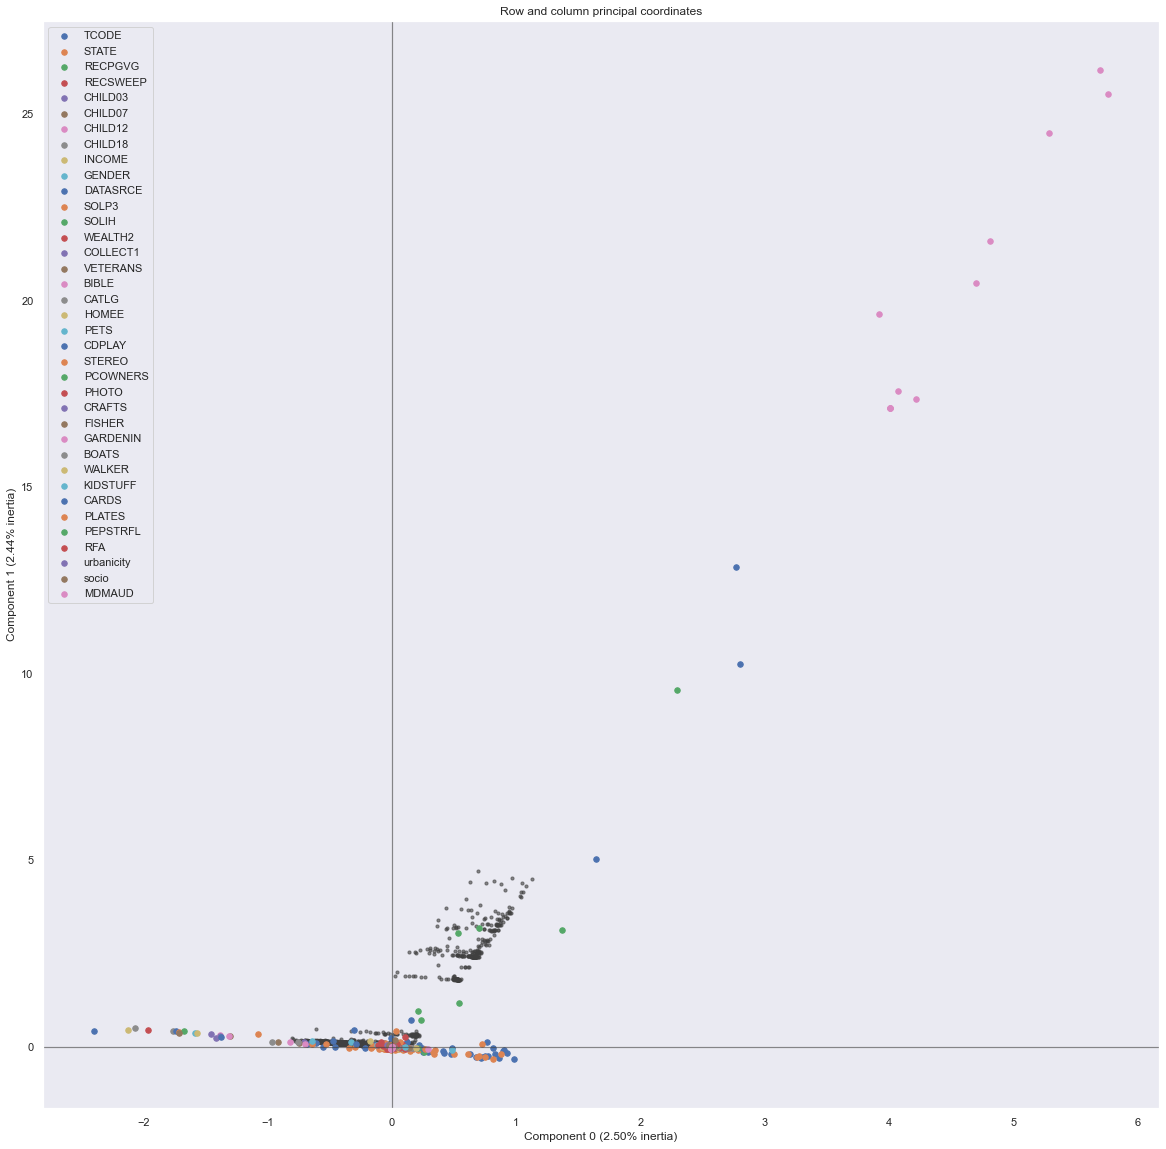

In [150]:
ax = mca.plot_coordinates(X=ohc_donors,ax=None,figsize=(20, 20),show_row_points=True,row_points_size=10, show_row_labels=False,show_column_points=True,column_points_size=30,show_column_labels=False,legend_n_cols=1)

ax.get_figure()

In [151]:
mca.eigenvalues_ #is by order, the most important are the first 6 but who are they

[0.025007755930022225,
 0.024415945022181276,
 0.012003010505455517,
 0.011312643947059501,
 0.010494410053544729,
 0.01015905033955156,
 0.009253160687997329,
 0.008696555847219348,
 0.008293163483453167,
 0.00809053367036734,
 0.007514185104055371,
 0.0073464623079441335,
 0.00716278957699374,
 0.007077563365768577,
 0.007049906286731592,
 0.006909410904404746,
 0.006693227362744616,
 0.0066162112809215485,
 0.0065308387101855195,
 0.006509864498535848,
 0.006474237210677594,
 0.00636980656676438,
 0.006319262587575032,
 0.0062767350929978675,
 0.006243277292997897,
 0.006217624820747847,
 0.006210271004817108,
 0.006161064030719842,
 0.006127705195945709,
 0.006098870675555208,
 0.006058930644652847,
 0.00602231931673257,
 0.005996169987606695,
 0.005985039582091446,
 0.005945861016817073,
 0.005922322453737979,
 0.005911238388567597,
 0.0058922955330118695,
 0.005869541900815685,
 0.005855738039875515,
 0.005829073484525631,
 0.0058227003583215245,
 0.005812901937277564,
 0.0057836

In [152]:
mca.total_inertia_


1.0

In [153]:
mca.explained_inertia_

[0.025007755930022225,
 0.024415945022181276,
 0.012003010505455517,
 0.011312643947059501,
 0.010494410053544729,
 0.01015905033955156,
 0.009253160687997329,
 0.008696555847219348,
 0.008293163483453167,
 0.00809053367036734,
 0.007514185104055371,
 0.0073464623079441335,
 0.00716278957699374,
 0.007077563365768577,
 0.007049906286731592,
 0.006909410904404746,
 0.006693227362744616,
 0.0066162112809215485,
 0.0065308387101855195,
 0.006509864498535848,
 0.006474237210677594,
 0.00636980656676438,
 0.006319262587575032,
 0.0062767350929978675,
 0.006243277292997897,
 0.006217624820747847,
 0.006210271004817108,
 0.006161064030719842,
 0.006127705195945709,
 0.006098870675555208,
 0.006058930644652847,
 0.00602231931673257,
 0.005996169987606695,
 0.005985039582091446,
 0.005945861016817073,
 0.005922322453737979,
 0.005911238388567597,
 0.0058922955330118695,
 0.005869541900815685,
 0.005855738039875515,
 0.005829073484525631,
 0.0058227003583215245,
 0.005812901937277564,
 0.0057836

In [154]:
# Python code to get the Cumulative sum of a list 
def Cumulative(lists): 
    cu_list = [] 
    length = len(lists) 
    cu_list = [sum(lists[0:x:1]) for x in range(0, length+1)] 
    return cu_list[1:]
 
print (Cumulative(mca.explained_inertia_)) 

[0.025007755930022225, 0.0494237009522035, 0.06142671145765902, 0.07273935540471851, 0.08323376545826325, 0.0933928157978148, 0.10264597648581214, 0.11134253233303149, 0.11963569581648466, 0.127726229486852, 0.13524041459090738, 0.14258687689885152, 0.14974966647584526, 0.15682722984161385, 0.16387713612834545, 0.1707865470327502, 0.1774797743954948, 0.18409598567641636, 0.1906268243866019, 0.19713668888513775, 0.20361092609581533, 0.20998073266257972, 0.21629999525015475, 0.22257673034315262, 0.2288200076361505, 0.23503763245689835, 0.24124790346171546, 0.2474089674924353, 0.253536672688381, 0.2596355433639362, 0.26569447400858903, 0.2717167933253216, 0.27771296331292833, 0.2836980028950198, 0.2896438639118369, 0.29556618636557486, 0.30147742475414246, 0.3073697202871543, 0.31323926218797, 0.3190950002278455, 0.3249240737123711, 0.3307467740706926, 0.33655967600797015, 0.34234329490056953, 0.34809568684052383, 0.35383751044777434, 0.3595760245989188, 0.36529463874228774, 0.37099724060

# Self Organizing Maps

In [155]:
from os.path import join
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier

import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

In [156]:
np.random.seed(42)

sm = sompy.SOMFactory().build(
    donors[metric_features].values, 
    mapsize=(10, 10),
    initialization='random', 
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=metric_features
)
sm.train(n_job=4, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.023000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 100

 epoch: 1 ---> elapsed time:  0.433000, quantization error: 147.550220

 epoch: 2 ---> elapsed time:  0.509000, quantization error: 9.663769

 epoch: 3 ---> elapsed time:  0.494000, quantization error: 9.606288

 epoch: 4 ---> elapsed time:  0.468000, quantization error: 9.470045

 epoch: 5 ---> elapsed time:  0.508000, quantization error: 9.393619

 epoch: 6 ---> elapsed time:  0.500000, quantization error: 9.367700

 epoch: 7 ---> elapsed time:  0.592000, quantization error: 9.359131

 epoch: 8 ---> elapsed time:  0.732000, quantization error: 9.354772

 epoch: 9 ---> elapsed time:  0.598000, quantization error: 9.350778

 epoch: 10 ---> elapsed time:  0.702000, quantization error: 9.346731

 epoch: 11 ---> elapsed time:  0.794000, quantization error: 9.342587

 epoch: 12 ---> elapsed time:  0.761000, quantization error: 9.338351

 epoch: 13 ---

 epoch: 14 ---> elapsed time:  0.462000, quantization error: 8.058804

 epoch: 15 ---> elapsed time:  0.667000, quantization error: 8.058677

 epoch: 16 ---> elapsed time:  0.529000, quantization error: 8.058543

 epoch: 17 ---> elapsed time:  0.497000, quantization error: 8.058429

 epoch: 18 ---> elapsed time:  0.576000, quantization error: 8.058293

 epoch: 19 ---> elapsed time:  0.602000, quantization error: 8.058144

 epoch: 20 ---> elapsed time:  0.488000, quantization error: 8.057997

 epoch: 21 ---> elapsed time:  0.585000, quantization error: 8.057845

 epoch: 22 ---> elapsed time:  0.462000, quantization error: 8.057702

 epoch: 23 ---> elapsed time:  0.464000, quantization error: 8.057547

 epoch: 24 ---> elapsed time:  0.616000, quantization error: 8.057363

 epoch: 25 ---> elapsed time:  0.502000, quantization error: 8.057131

 epoch: 26 ---> elapsed time:  0.469000, quantization error: 8.056914

 epoch: 27 ---> elapsed time:  0.469000, quantization error: 8.056687

 epoch

In [157]:
!pip3 install PyQt5==5.12

You should consider upgrading via the 'C:\Users\marta\anaconda3\python.exe -m pip install --upgrade pip' command.


None


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\marta\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Users\marta\anaconda3\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "C:\Users\marta\anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 270, in idle_draw
    self.draw()
  File "C:\Users\marta\anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\marta\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 393, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\marta\anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1556, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x00000297E6BA0910>
Exception in Tkinter callback
Traceba

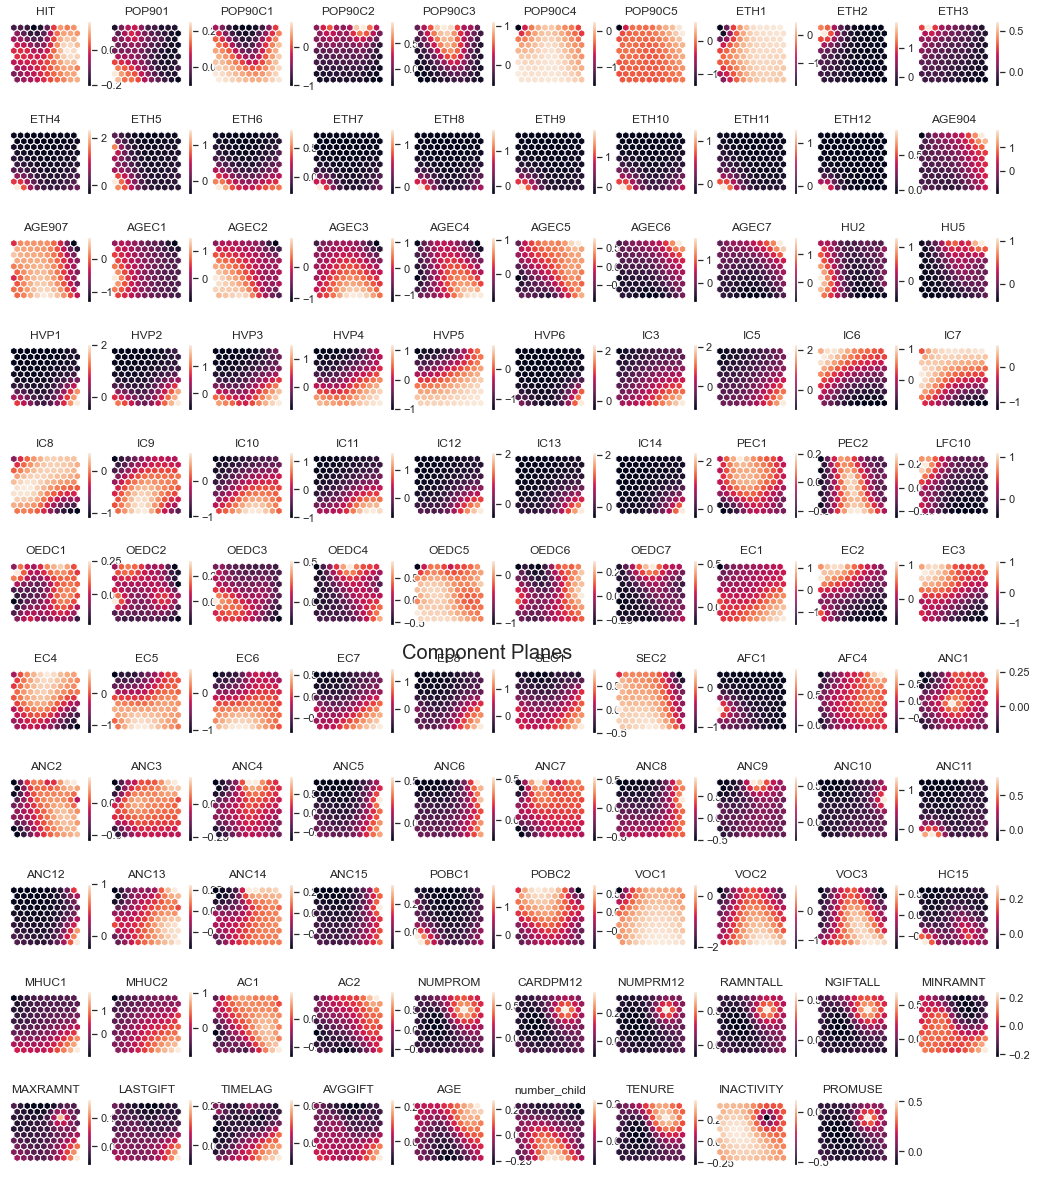

In [158]:
import matplotlib
matplotlib.use('TkAgg')
# Visualizing the Component planes (feature values)
sns.set()
view2D = View2D(100,100,"", text_size=10)
view2D.show(sm, col_sz=10, what='codebook')
plt.subplots_adjust(top=2)
plt.suptitle("Component Planes", fontsize=20)

plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

In [159]:
# Here you have U-matrix
u = sompy.umatrix.UMatrixView(12, 12, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    sm, 
    distance2=1, 
    row_normalized=False, 
    show_data=True, 
    contooor=True, # Visualize isomorphic curves
    blob=False
)

UMAT[1]  # U-matrix values - no colorscale so we have to rely on the values :(

array([[1.21885412, 1.19858248, 1.04188572, 0.94609649, 0.93152373,
        0.84328586, 0.88969283, 1.04416986, 1.46916908, 1.96125511],
       [1.07249473, 1.01684198, 1.02396485, 0.86963241, 0.80458005,
        0.72957791, 0.78960793, 0.91480205, 1.11039058, 1.63790512],
       [1.09503082, 1.05928428, 1.04061559, 0.83596651, 0.76485025,
        0.75719775, 0.83341557, 0.9668862 , 1.03795726, 1.15042325],
       [1.12140411, 0.98035613, 0.91299573, 0.83013376, 0.77217653,
        0.73358686, 0.8010905 , 0.8990623 , 0.97815518, 1.01330382],
       [1.02935759, 0.94181944, 0.92725005, 0.87129777, 0.77993049,
        0.76736166, 0.82603206, 0.85488435, 0.84919299, 0.88056305],
       [0.97959918, 0.94268876, 0.93558161, 0.87885655, 0.80301698,
        0.79246564, 0.82893249, 0.88525227, 0.93921055, 1.00570558],
       [1.14457291, 1.08856381, 1.02655536, 0.926301  , 0.84009987,
        0.82921629, 0.86073972, 0.92809098, 1.0549761 , 1.21275043],
       [1.27852422, 1.18802039, 1.105445 

None


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\marta\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Users\marta\anaconda3\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "C:\Users\marta\anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 270, in idle_draw
    self.draw()
  File "C:\Users\marta\anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\marta\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 393, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\marta\anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1556, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x00000297E4ED64F0>
Exception in Tkinter callback
Traceba

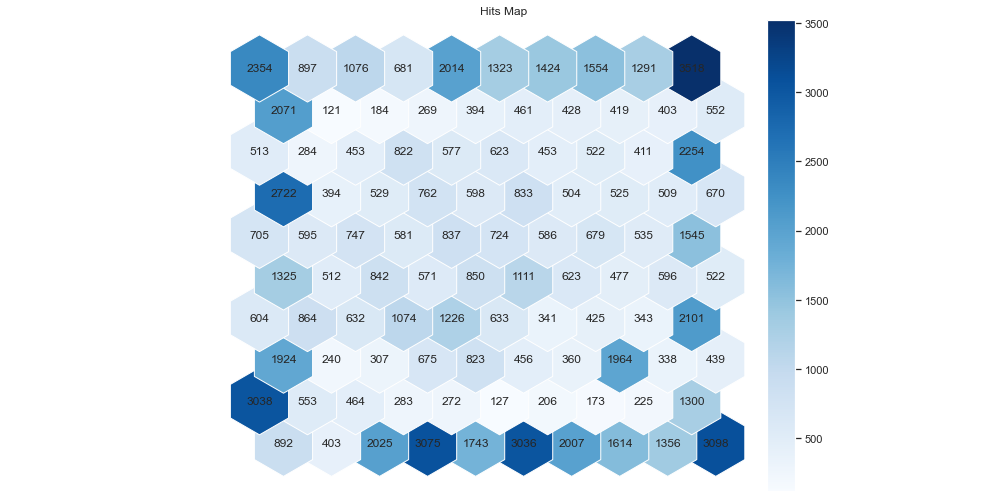

In [160]:
vhts  = BmuHitsView(12,12,"Hits Map")
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=12, cmap="Blues")
plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

In [161]:
# Coordinates of the units in the input space
sm.get_node_vectors()

array([[0.10414894, 0.02760129, 0.57739165, ..., 0.11441001, 0.6078186 ,
        0.36151362],
       [0.10081405, 0.02770772, 0.37749142, ..., 0.11768226, 0.60556034,
        0.36335763],
       [0.10548085, 0.0273973 , 0.23788967, ..., 0.12360537, 0.60426297,
        0.36440297],
       ...,
       [0.08076764, 0.04349771, 0.85986684, ..., 0.0887801 , 0.63545941,
        0.33569329],
       [0.07929675, 0.04333293, 0.88828413, ..., 0.08889901, 0.63156728,
        0.33923917],
       [0.07470127, 0.04802755, 0.91175359, ..., 0.08742187, 0.62664316,
        0.34374643]])

In [162]:
# U-matrix of the 50x50 grid
u = sompy.umatrix.UMatrixView(12, 12, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    sm, 
    distance2=1, 
    row_normalized=False, 
    show_data=False, 
    contooor=True # Visualize isomorphic curves
)

None


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\marta\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Users\marta\anaconda3\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "C:\Users\marta\anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 270, in idle_draw
    self.draw()
  File "C:\Users\marta\anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\marta\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 393, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\marta\anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1556, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x00000297E5789C40>
Exception in Tkinter callback
Traceba

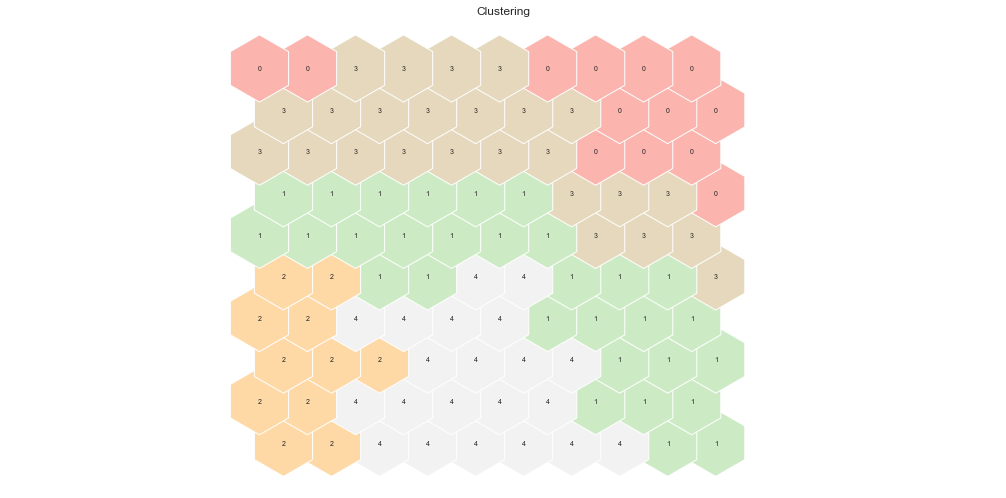

In [163]:
#Perform K-Means clustering on top of the 2500 untis (sm.get_node_vectors() output)
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=20, random_state=42)
nodeclus_labels = sm.cluster(kmeans)

hits  = HitMapView(12, 12,"Clustering", text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

None


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\marta\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Users\marta\anaconda3\lib\tkinter\__init__.py", line 804, in callit
    func(*args)
  File "C:\Users\marta\anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 270, in idle_draw
    self.draw()
  File "C:\Users\marta\anaconda3\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "C:\Users\marta\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 393, in draw
    self.figure.draw(self.renderer)
  File "C:\Users\marta\anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1556, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backend_agg.RendererAgg object at 0x00000297E5B63700>
Exception in Tkinter callback
Traceba

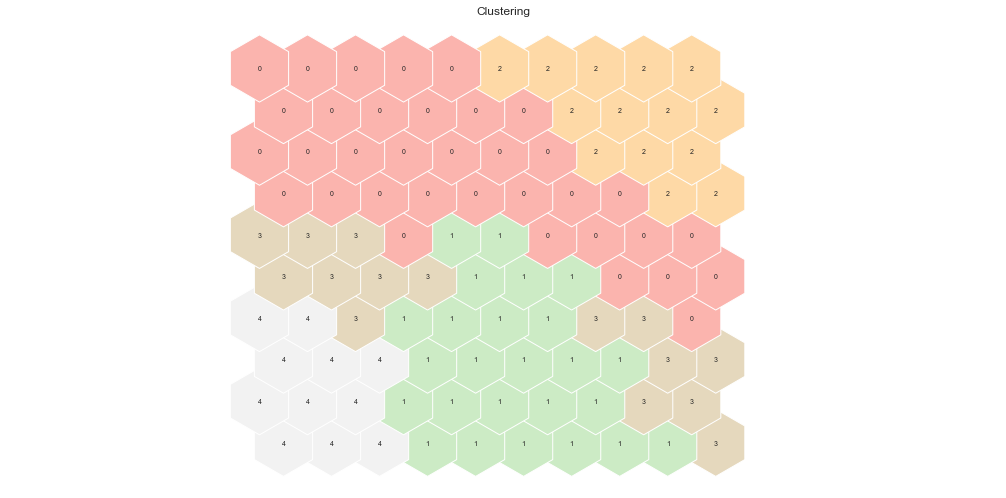

In [164]:
hierclust = AgglomerativeClustering(n_clusters=5, linkage='ward')
nodeclus_labels = sm.cluster(hierclust)

hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

In [165]:
# Check the nodes and and respective clusters
nodes = sm.get_node_vectors()

df_nodes = pd.DataFrame(nodes, columns=metric_features)
df_nodes['label'] = nodeclus_labels
df_nodes

HIT    POP901   POP90C1   POP90C2   POP90C3   POP90C4   POP90C5  \
0   0.104149  0.027601  0.577392  0.207972  0.216397  0.462712  0.547317   
1   0.100814  0.027708  0.377491  0.310286  0.314823  0.474367  0.535561   
2   0.105481  0.027397  0.237890  0.434751  0.330329  0.478365  0.531352   
3   0.092004  0.030057  0.153550  0.395768  0.453492  0.485797  0.523507   
4   0.070515  0.030007  0.101862  0.206506  0.692704  0.493476  0.515002   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.090045  0.036647  0.810239  0.063541  0.128793  0.501635  0.508409   
96  0.085200  0.041269  0.832837  0.062215  0.107071  0.500822  0.509180   
97  0.080768  0.043498  0.859867  0.060726  0.081001  0.500447  0.509519   
98  0.079297  0.043333  0.888284  0.052317  0.060459  0.500445  0.509490   
99  0.074701  0.048028  0.911754  0.047809  0.041179  0.500841  0.509095   

        ETH1      ETH2      ETH3  ...  MAXRAMNT  LASTGIFT   TIMELAG   AVGGIFT  \
0   0.963438  0.021399  0.004426  ...  0.002910  0.016326  0.007293  0.011148   
1   0.957859  0.023851  0.007181  ...  0.002945  0.016258  0.007361  0.011023   
2   0.955010  0.025991  0.008336  ...  0.002887  0.015876  0.007367  0.010597   
3   0.955772  0.026047  0.009035  ...  0.002759  0.015596  0.007416  0.010261   
4   0.947117  0.033746  0.010249  ...  0.002686  0.015627  0.007464  0.010337   
..       ...       ...       ...  ...       ...       ...       ...       ...   
95  0.899218  0.045746  0.004841  ...  0.002934  0.017388  0.007530  0.012284   
96  0.858770  0.055137  0.005885  ...  0.002963  0.017593  0.007535  0.012545   
97  0.800681  0.062948  0.006836  ...  0.002994  0.017640  0.007496  0.012619   
98  0.726295  0.067767  0.006804  ...  0.003063  0.017870  0.007430  0.012830   
99  0.636247  0.072432  0.006233  ...  0.003123  0.018078  0.007424  0.013068   

         AGE  number_child    TENURE  INACTIVITY   PROMUSE  label  
0   0.731375      0.007465  0.114410    0.607819  0.361514      3  
1   0.720157      0.008949  0.117682    0.605560  0.363358      1  
2   0.711202      0.011494  0.123605    0.604263  0.364403      1  
3   0.698868      0.012636  0.123859    0.611232  0.357914      1  
4   0.690077      0.010847  0.118510    0.620169  0.349639      1  
..       ...           ...       ...         ...       ...    ...  
95  0.625625      0.032723  0.090593    0.635925  0.335378      0  
96  0.633741      0.026792  0.087809    0.637008  0.334346      0  
97  0.645116      0.020400  0.088780    0.635459  0.335693      0  
98  0.653567      0.016315  0.088899    0.631567  0.339239      0  
99  0.658119      0.014379  0.087422    0.626643  0.343746      0  

[100 rows x 110 columns]

In [166]:
# Obtaining SOM's BMUs labels
bmus_map = sm.find_bmu(donors[metric_features])[0]  # get bmus for each observation in df

df_bmus = pd.DataFrame(
    np.concatenate((donors[metric_features], np.expand_dims(bmus_map,1)), axis=1),
    index=donors.index, columns=np.append(donors[metric_features].columns,"BMU")
)
df_bmus

HIT    POP901   POP90C1   POP90C2   POP90C3   POP90C4  \
CONTROLN                                                               
95515     0.000000  0.010051  0.000000  0.353535  0.656566  0.474747   
148535    0.516129  0.036585  1.000000  0.000000  0.000000  0.505051   
15078     0.064516  0.070931  0.000000  0.020202  0.989899  0.494949   
172556    0.064516  0.006484  0.000000  0.080808  0.929293  0.545455   
47784     0.000000  0.184112  0.818182  0.000000  0.191919  0.494949   
...            ...       ...       ...       ...       ...       ...   
184568    0.000000  0.277403  1.000000  0.000000  0.000000  0.505051   
122706    0.032258  0.012705  0.969697  0.000000  0.040404  0.515152   
189641    0.000000  0.005593  1.000000  0.000000  0.000000  0.535354   
4693      0.000000  0.017690  1.000000  0.000000  0.000000  0.474747   
185114    0.096774  0.039868  1.000000  0.000000  0.000000  0.484848   

           POP90C5      ETH1      ETH2      ETH3  ...  MAXRAMNT  LASTGIFT  \
CONTROLN                                          ...                       
95515     0.535354  0.929293  0.010101  0.000000  ...  0.001401     0.010   
148535    0.505051  0.676768  0.000000  0.000000  ...  0.004004     0.025   
15078     0.515152  0.969697  0.020202  0.000000  ...  0.002202     0.005   
172556    0.464646  0.616162  0.000000  0.000000  ...  0.001201     0.010   
47784     0.515152  0.939394  0.060606  0.010101  ...  0.002202     0.015   
...            ...       ...       ...       ...  ...       ...       ...   
184568    0.505051  0.787879  0.101010  0.060606  ...  0.004004     0.025   
122706    0.494949  0.919192  0.030303  0.000000  ...  0.003003     0.020   
189641    0.474747  0.828283  0.141414  0.000000  ...  0.001001     0.010   
4693      0.535354  0.929293  0.010101  0.010101  ...  0.003203     0.018   
185114    0.525253  0.868687  0.121212  0.000000  ...  0.039239     0.100   

           TIMELAG   AVGGIFT       AGE  number_child    TENURE  INACTIVITY  \
CONTROLN                                                                     
95515     0.003676  0.006465  0.689655           0.0  0.148936    0.608696   
148535    0.016544  0.014399  0.517241           0.2  0.063830    0.608696   
15078     0.011029  0.006204  0.674211           0.0  0.127660    0.608696   
172556    0.008272  0.005534  0.793103           0.0  0.191489    0.608696   
47784     0.005515  0.011479  0.674211           0.0  0.042553    0.869565   
...            ...       ...       ...           ...       ...         ...   
184568    0.007436  0.023745  0.674211           0.0  0.000000    0.521739   
122706    0.007436  0.018738  0.540230           0.2  0.000000    0.478261   
189641    0.002757  0.007009  0.678161           0.0  0.042553    0.173913   
4693      0.003676  0.010875  0.655172           0.0  0.212766    0.043478   
185114    0.005515  0.095632  0.908046           0.0  0.170213    0.086957   

          PROMUSE   BMU  
CONTROLN                 
95515        0.36  42.0  
148535       0.36  61.0  
15078        0.36  43.0  
172556       0.36  53.0  
47784        0.12  53.0  
...           ...   ...  
184568       0.44  52.0  
122706       0.48  62.0  
189641       0.76  42.0  
4693         0.88  52.0  
185114       0.84  52.0  

[93014 rows x 110 columns]

In [167]:
# Get cluster labels for each observation
df_final = df_bmus.merge(df_nodes['label'], 'left', left_on="BMU", right_index=True)
df_final

HIT    POP901   POP90C1   POP90C2   POP90C3   POP90C4  \
CONTROLN                                                               
95515     0.000000  0.010051  0.000000  0.353535  0.656566  0.474747   
148535    0.516129  0.036585  1.000000  0.000000  0.000000  0.505051   
15078     0.064516  0.070931  0.000000  0.020202  0.989899  0.494949   
172556    0.064516  0.006484  0.000000  0.080808  0.929293  0.545455   
47784     0.000000  0.184112  0.818182  0.000000  0.191919  0.494949   
...            ...       ...       ...       ...       ...       ...   
184568    0.000000  0.277403  1.000000  0.000000  0.000000  0.505051   
122706    0.032258  0.012705  0.969697  0.000000  0.040404  0.515152   
189641    0.000000  0.005593  1.000000  0.000000  0.000000  0.535354   
4693      0.000000  0.017690  1.000000  0.000000  0.000000  0.474747   
185114    0.096774  0.039868  1.000000  0.000000  0.000000  0.484848   

           POP90C5      ETH1      ETH2      ETH3  ...  LASTGIFT   TIMELAG  \
CONTROLN                                          ...                       
95515     0.535354  0.929293  0.010101  0.000000  ...     0.010  0.003676   
148535    0.505051  0.676768  0.000000  0.000000  ...     0.025  0.016544   
15078     0.515152  0.969697  0.020202  0.000000  ...     0.005  0.011029   
172556    0.464646  0.616162  0.000000  0.000000  ...     0.010  0.008272   
47784     0.515152  0.939394  0.060606  0.010101  ...     0.015  0.005515   
...            ...       ...       ...       ...  ...       ...       ...   
184568    0.505051  0.787879  0.101010  0.060606  ...     0.025  0.007436   
122706    0.494949  0.919192  0.030303  0.000000  ...     0.020  0.007436   
189641    0.474747  0.828283  0.141414  0.000000  ...     0.010  0.002757   
4693      0.535354  0.929293  0.010101  0.010101  ...     0.018  0.003676   
185114    0.525253  0.868687  0.121212  0.000000  ...     0.100  0.005515   

           AVGGIFT       AGE  number_child    TENURE  INACTIVITY  PROMUSE  \
CONTROLN                                                                    
95515     0.006465  0.689655           0.0  0.148936    0.608696     0.36   
148535    0.014399  0.517241           0.2  0.063830    0.608696     0.36   
15078     0.006204  0.674211           0.0  0.127660    0.608696     0.36   
172556    0.005534  0.793103           0.0  0.191489    0.608696     0.36   
47784     0.011479  0.674211           0.0  0.042553    0.869565     0.12   
...            ...       ...           ...       ...         ...      ...   
184568    0.023745  0.674211           0.0  0.000000    0.521739     0.44   
122706    0.018738  0.540230           0.2  0.000000    0.478261     0.48   
189641    0.007009  0.678161           0.0  0.042553    0.173913     0.76   
4693      0.010875  0.655172           0.0  0.212766    0.043478     0.88   
185114    0.095632  0.908046           0.0  0.170213    0.086957     0.84   

           BMU  label  
CONTROLN               
95515     42.0      0  
148535    61.0      2  
15078     43.0      1  
172556    53.0      0  
47784     53.0      0  
...        ...    ...  
184568    52.0      0  
122706    62.0      0  
189641    42.0      0  
4693      52.0      0  
185114    52.0      0  

[93014 rows x 111 columns]

In [168]:
# Characterizing the final clusters
df_final.drop(columns='BMU').groupby('label').mean()

HIT    POP901   POP90C1   POP90C2   POP90C3   POP90C4   POP90C5  \
label                                                                         
0      0.094845  0.033767  0.650488  0.155141  0.186878  0.485288  0.515322   
1      0.041825  0.028535  0.001638  0.015634  0.984254  0.501562  0.508547   
2      0.113499  0.021878  0.987253  0.000000  0.013315  0.495166  0.514935   
3      0.085797  0.008956  0.854167  0.114338  0.003858  0.431047  0.550996   

           ETH1      ETH2      ETH3  ...  MINRAMNT  MAXRAMNT  LASTGIFT  \
label                                ...                                 
0      0.851964  0.075950  0.007086  ...  0.007953  0.003000  0.017278   
1      0.902779  0.076595  0.015885  ...  0.007299  0.002695  0.016244   
2      0.883089  0.016317  0.000763  ...  0.010682  0.004092  0.022576   
3      0.334035  0.620090  0.004419  ...  0.008303  0.004188  0.020681   

        TIMELAG   AVGGIFT       AGE  number_child    TENURE  INACTIVITY  \
label                                                                     
0      0.007440  0.012083  0.674093      0.017490  0.099484    0.623272   
1      0.007303  0.011011  0.662808      0.010530  0.103257    0.638860   
2      0.007944  0.016410  0.685363      0.016176  0.089859    0.626907   
3      0.007430  0.013336  0.698042      0.015278  0.096188    0.560386   

        PROMUSE  
label            
0      0.346956  
1      0.332449  
2      0.343610  
3      0.405000  

[4 rows x 109 columns]

In [169]:
# using R^2
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_final[metric_features])  # get total sum of squares
ssw_labels = df_final[metric_features + ["label"]].groupby(by='label').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
r2

0.13089579519271588

# KMeans

In [170]:
kmclust = KMeans(n_clusters=5, init='random', n_init=10, random_state=1)
# the fit method
kmclust.fit(metric_features)
kmclust.predict(metric_features)

ValueError: could not convert string to float: 'HIT'

In [ ]:
pd.DataFrame(kmclust.transform(metric_features))

In [ ]:
# Storing average silhouette metric
range_clusters = range(1, 15)
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(metric_features)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(metric_features, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(metric_features, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(metric_features) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

In [ ]:
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(avg_silhouette)
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()
fig = plt.gcf()
print(fig.show())
from IPython.display import display
display(fig)

In [ ]:
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
dbscan = DBSCAN(eps=1.9, min_samples=20, n_jobs=4)
dbscan_labels = dbscan.fit_predict(donors[metric_features])



dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)